**Problem Statement**

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.

**Steps:-**

The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.

1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', 200)

**Exploring the dataset**

Reading and understanding of data

In [ ]:
#Download creditcard.csv file through mentioned link https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

#Reading the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Handling Missing Values**

Handling missing values in columns

In [9]:
# Cheking percent of missing values in columns
df_missing_columns = ((df.isnull().sum()/len(df.index))*100).to_frame('null')
df_missing_columns

,null
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


We can see that there is no missing value in any column of the dataset. Hense, ther is no problem with null values in the entire dataset.

**Checking the distriution fo class**

In [10]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
normal_share = round(classes[0]/df['Class'].count()*100,2)
fraud_share = round(classes[1]/df['Class'].count()*100,2)

{"Normal Share":normal_share,"Fraud Share":fraud_share}

{'Normal Share': 99.83, 'Fraud Share': 0.17}

We can see that there is only 0.17% frauds. We will take care of the class imbalance later

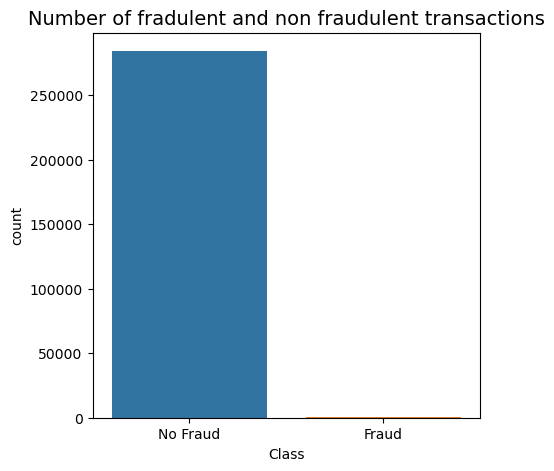

In [12]:
#Bar plot for the number of fradulent and non fraudulent transactions
plt.figure(figsize=(5,5))
sns.countplot(x='Class',data=df)
plt.title('Number of fradulent and non fraudulent transactions', fontsize=14)
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.show()

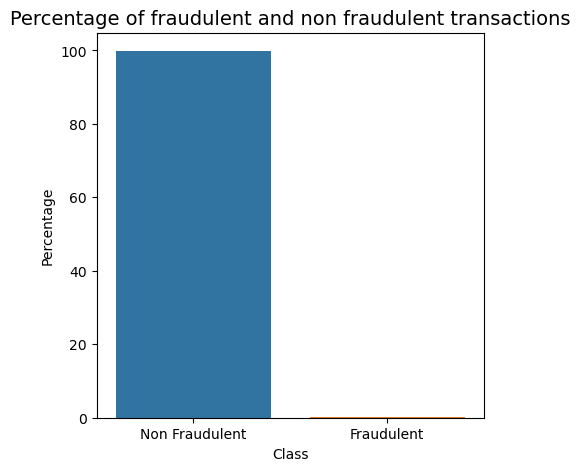

In [13]:
# Bar plot for the percentage of fraudulent and non fraudulent transactions
plt.figure(figsize=(5,5))
fraudulant_percentage = {'Class':['Non Fraudulent', 'Fraudulent'],'Percentage': [normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraudulant_percentage)
sns.barplot(x='Class', y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent and non fraudulent transactions', fontsize=14)
plt.show()

**Outlier Treatment**

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

**Observe the distribution of classes with time**

In [14]:
#Creating a fradulent dataframe
data_fraud = df[df['Class'] == 1]

#Creating a non fradulent dataframe
data_non_fraud = df[df['Class'] == 0]

<function matplotlib.pyplot.show(close=None, block=None)>

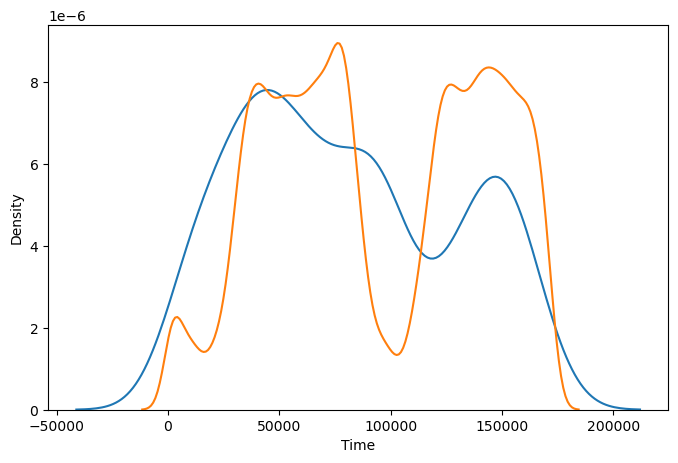

In [15]:
#Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraud',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fradulent',hist=False)
ax.set(xlabel='Time')
plt.show

Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [16]:
#Dropping the Time column
df.drop('Time',axis=1,inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Observe the distribution of classes with amount**

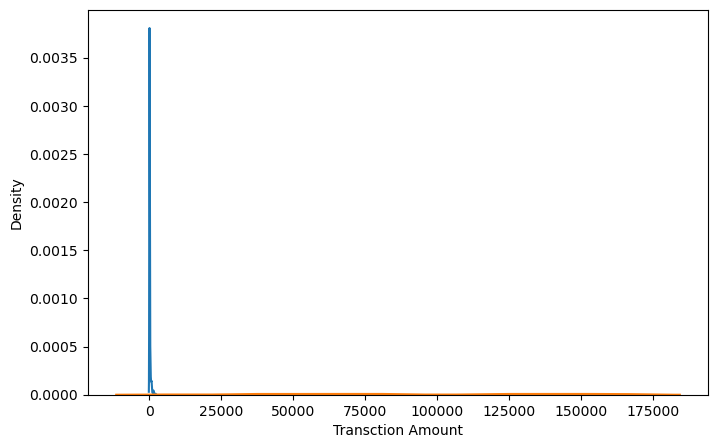

In [17]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

Analysis

We can see that the fraudulant transctions are mostly densed in the lower range of amount, whereas the non-fradulant transcation are spreaded throughtout low to hight range of amount

**Train Test Split**

In [18]:
# Import library for Train Test split
from sklearn.model_selection import train_test_split

# Putting feature variable in X
X = df.drop('Class',axis=1)

# Putting target variable in y
y = df['Class']

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,test_size=0.2, random_state=100)

**Feature Scaling**

We need to scale only the Amount column as all the other column are already scaled by the PCA transformation

In [19]:
# Standardization method
from sklearn.preprocessing import StandardScaler

#Initilization the Scaler
scaler = StandardScaler()

#Fitting the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


Scaling the test set

We don't fit scaler on the test set. We only transform the test set.

In [20]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


**Checking the Skewness**

In [21]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

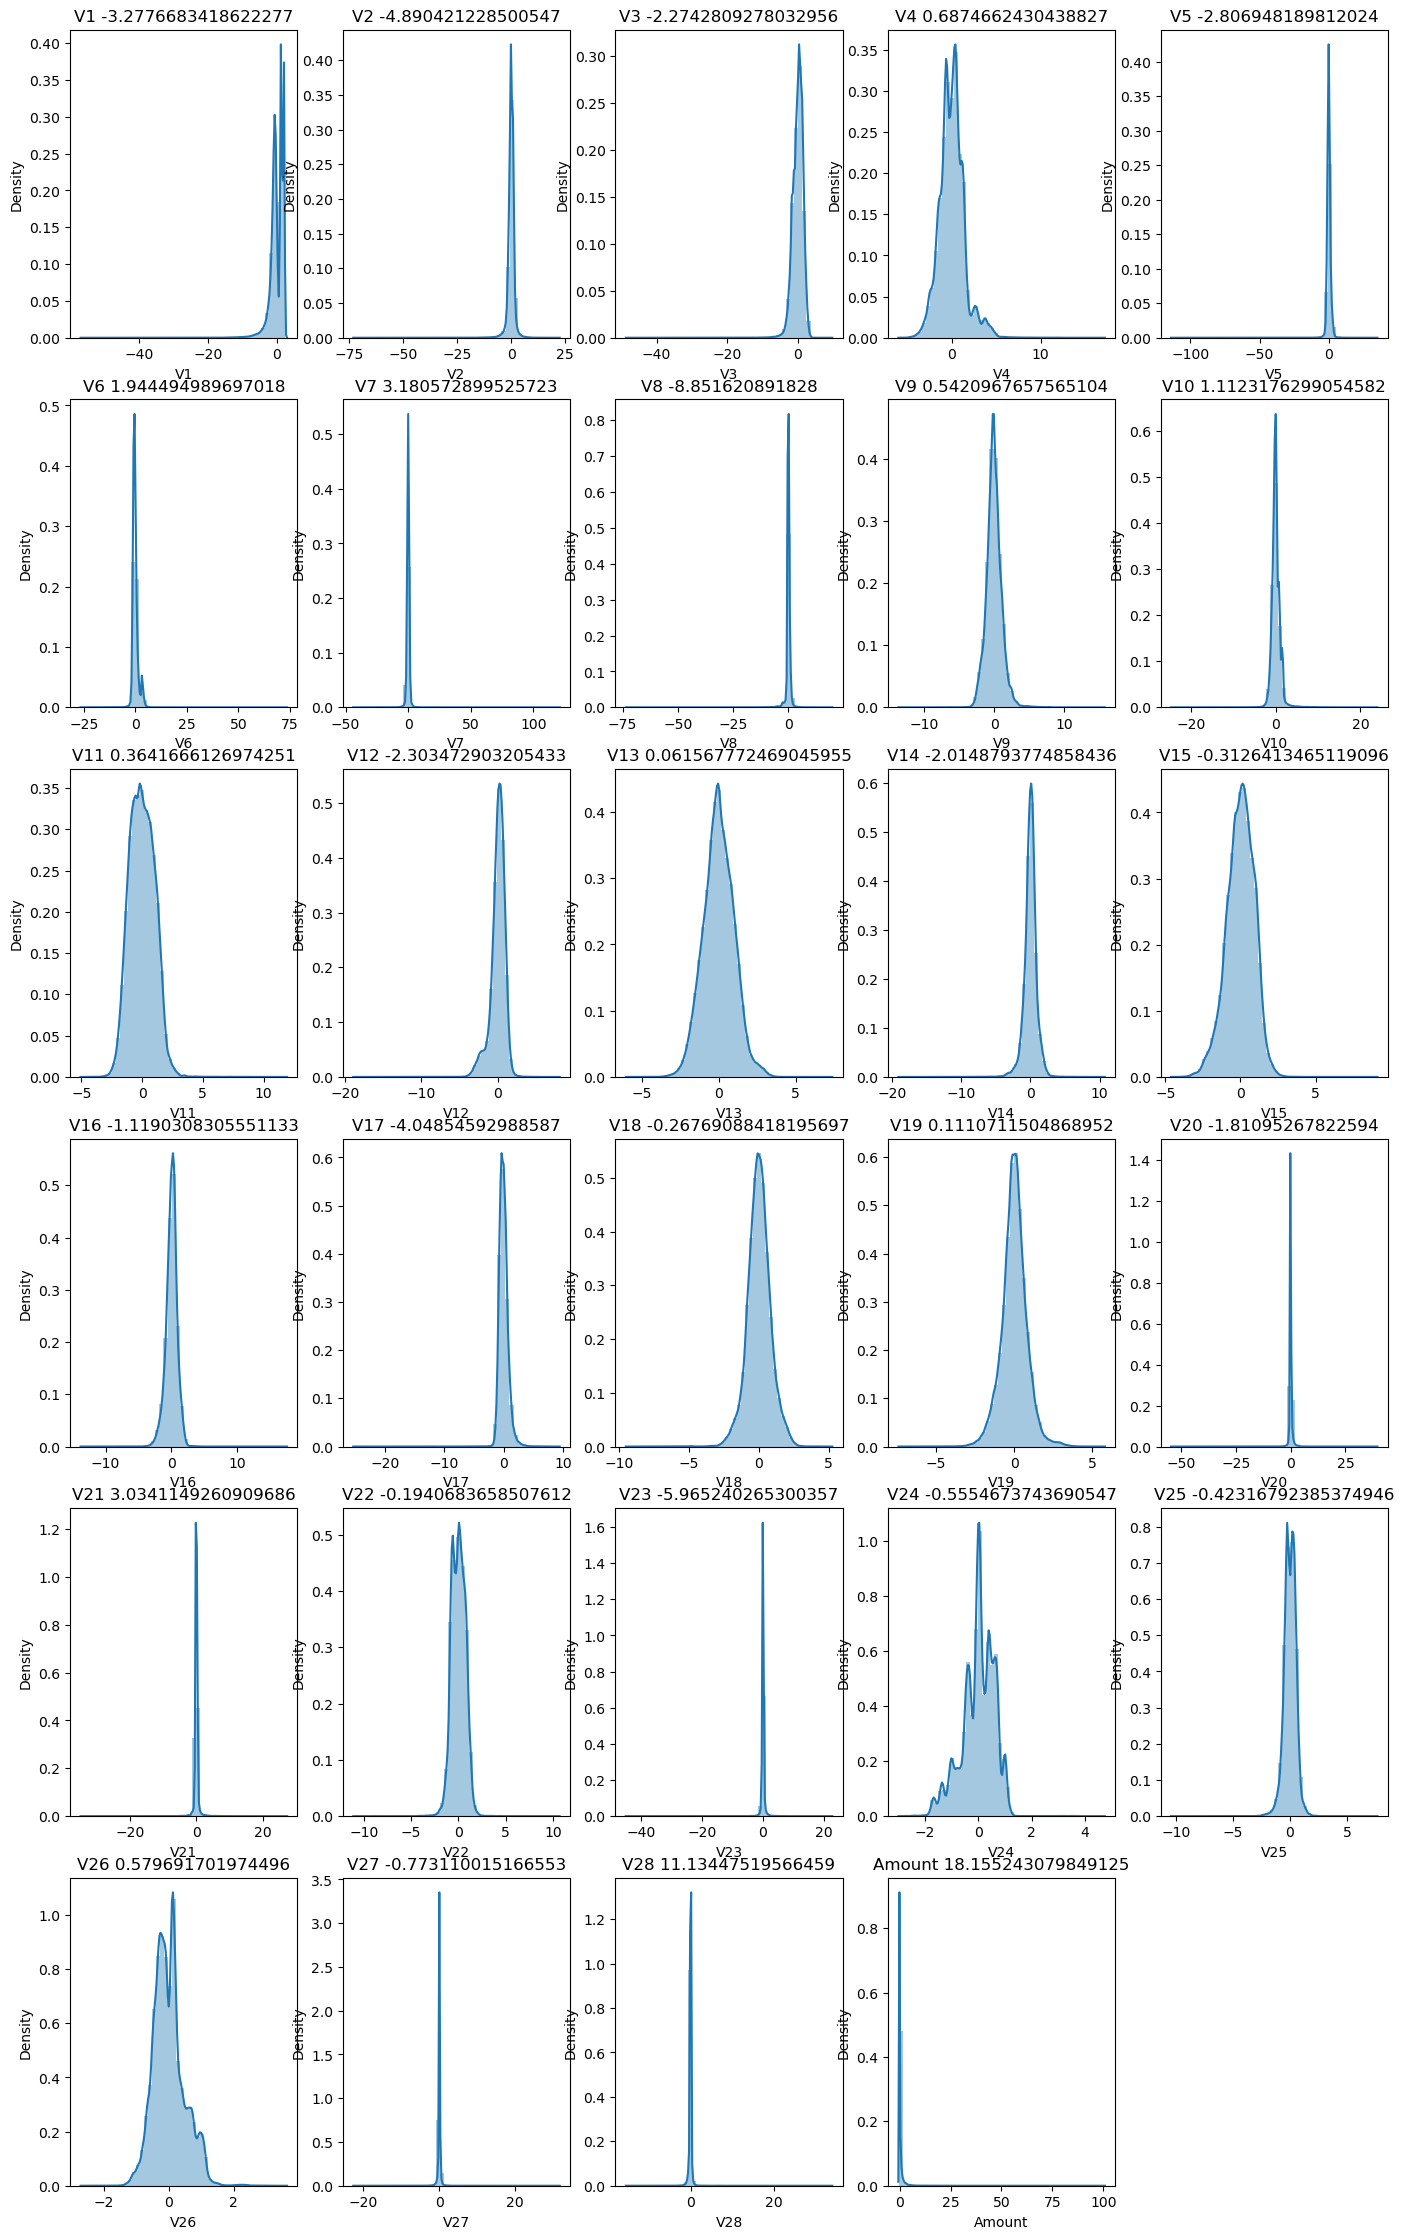

In [22]:
#Plotting the distribution of the variable (sknewss) of all the columns
k = 0
plt.figure(figsize=(17,28))
for i in cols:
    k = k+1
    plt.subplot(6,5,k)
    sns.distplot(X_train[i])
    plt.title(i + ' '+str(X_train[i].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

**Mitigate skweness with PowerTransformer**

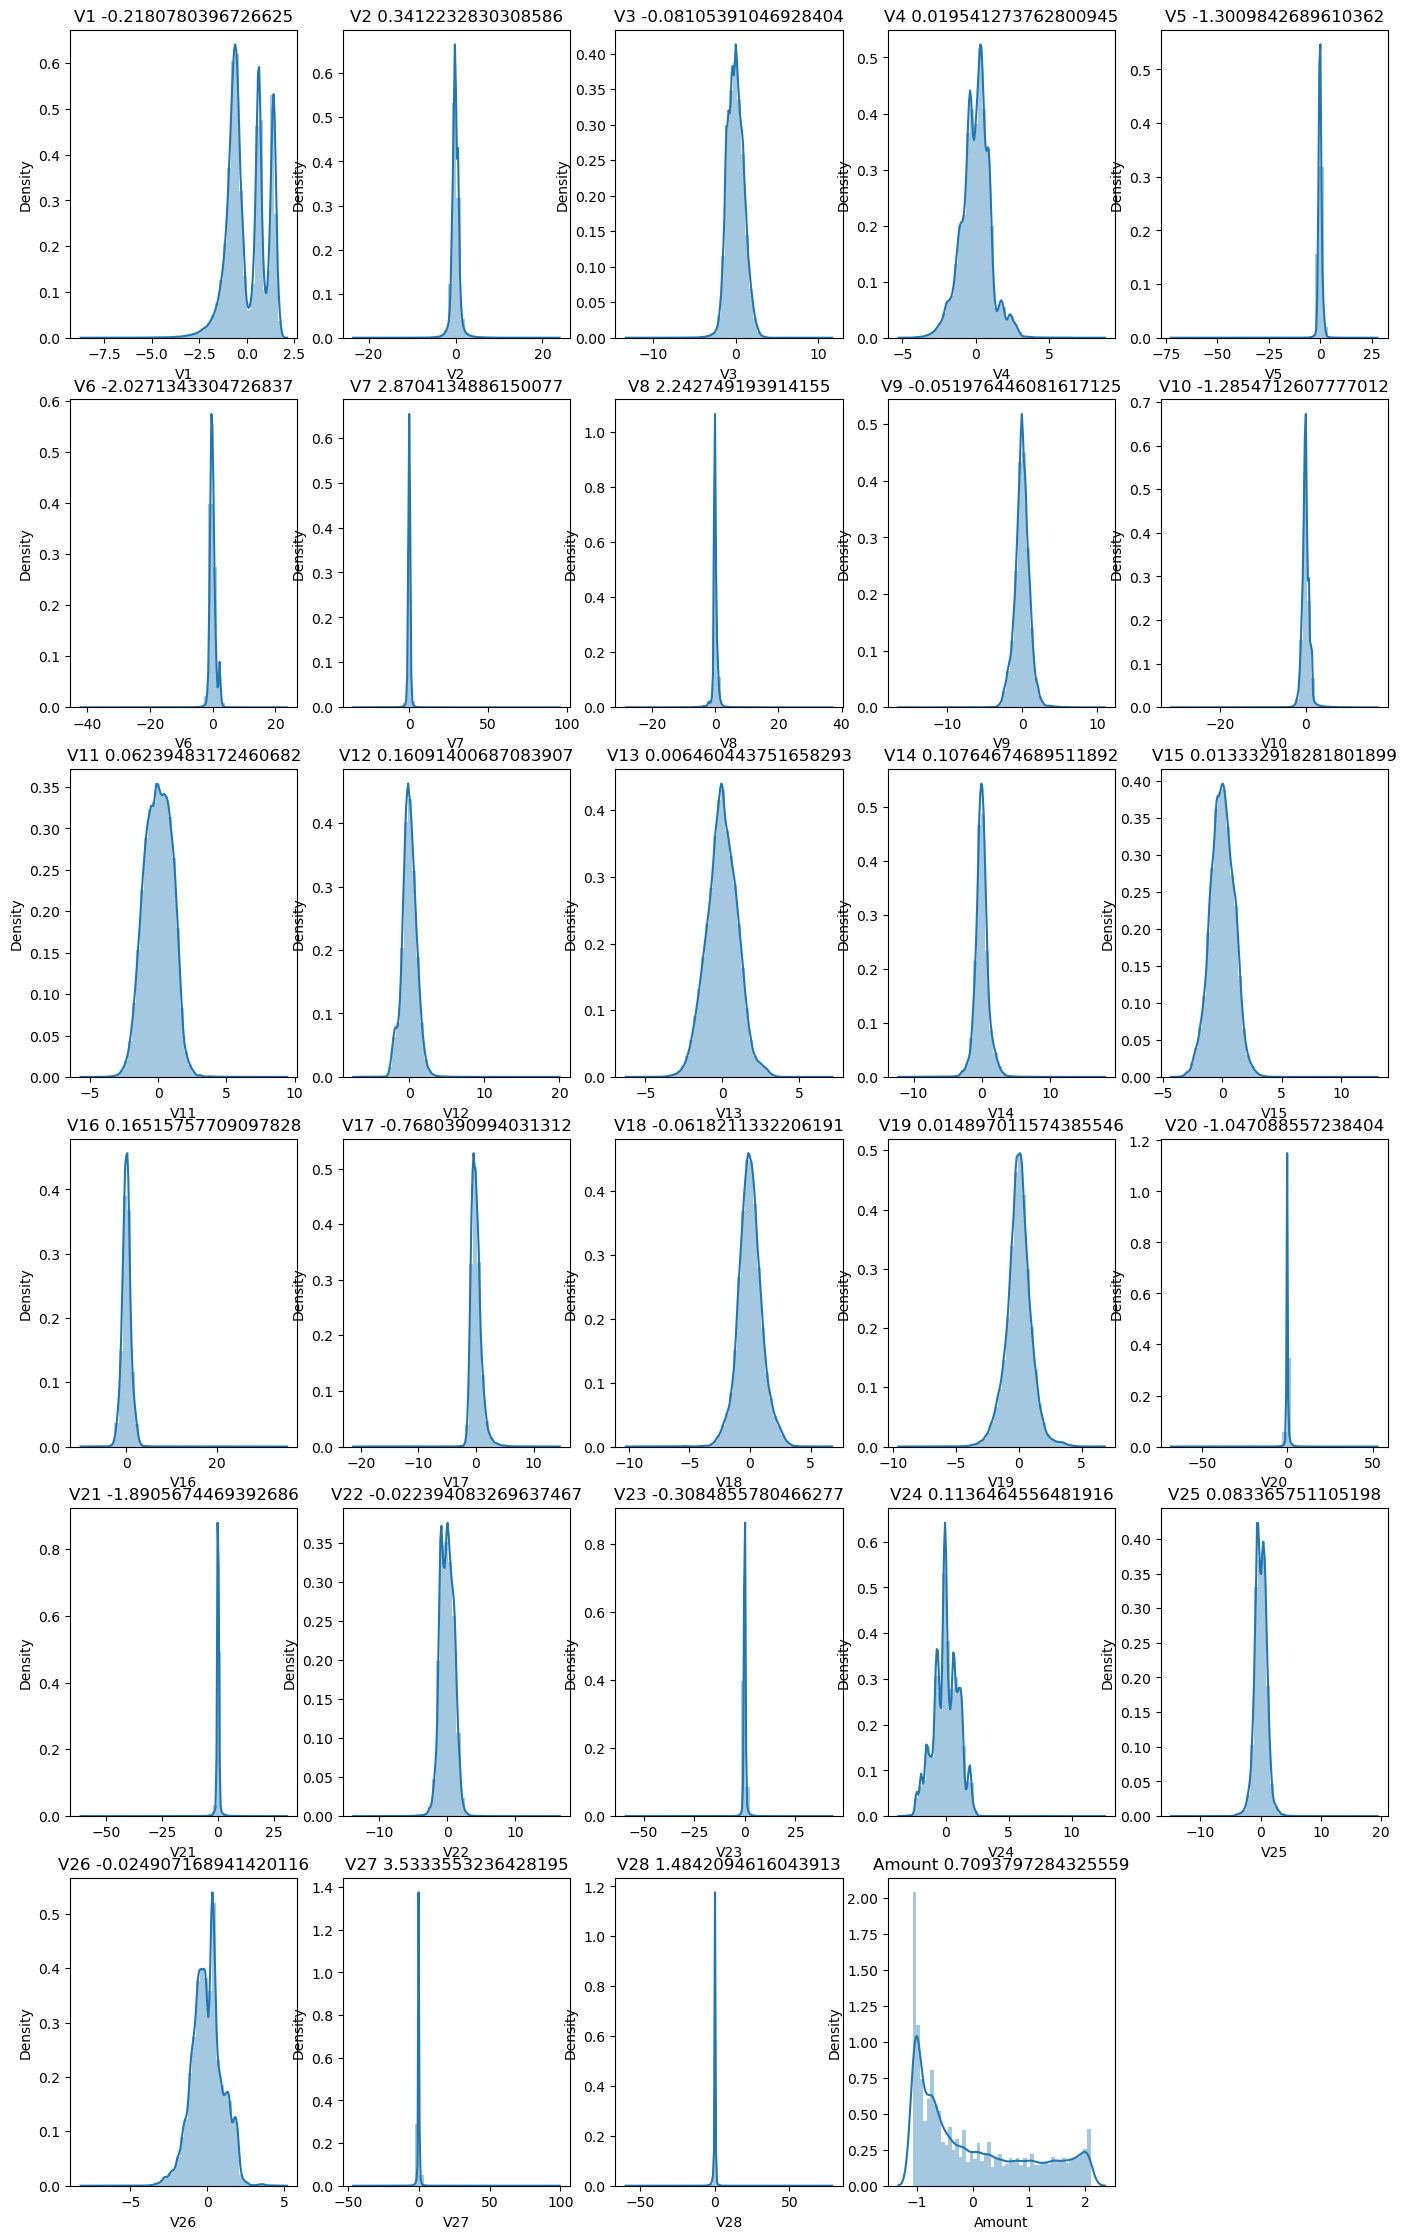

In [23]:
# Importing Power Transformer
from sklearn.preprocessing import PowerTransformer

# Initialization the Power Transformer
pt = PowerTransformer(method='yeo-johnson',standardize=True, copy=False)

# Fit the Transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

# Transform the train set
X_test[cols] = pt.transform(X_test)

# Plotting the distribution of the variables (skewness) of all the columns
k = 0;
plt.figure(figsize=(17,28))
for i in cols:
    k = k+1
    plt.subplot(6,5,k)
    sns.distplot(X_train[i])
    plt.title(i + ' '+str(X_train[i].skew()))

**Model building on imbalanced data**

**Metric selection for heavily imbalanced data**

As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

**Why SVM was not tried for model building and Random Forest was not tried for few cases?**

In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

**Why KNN was not used for model building?**

KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

**Logistic Regression**

In [24]:
# Importing sckit learn logistic regression
from sklearn.linear_model import LogisticRegression

# Importing Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,f1_score

**Tunning Hyperparameter C**

C is the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization

In [25]:
# Importing library for cross validation
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [26]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.454085,0.036199,0.024669,0.004516,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,0.993743,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,0.549382,0.038177,0.026502,0.009427,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,0.992284,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,0.581015,0.032319,0.024659,0.006856,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,0.991548,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,0.610484,0.056074,0.023856,0.005749,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,0.991467,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,0.605737,0.035197,0.023903,0.007803,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,0.991461,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376
5,0.603888,0.049877,0.021962,0.005267,1000,{'C': 1000},0.985793,0.986747,0.958153,0.979663,0.991461,0.980363,0.011723,6,0.981623,0.983256,0.987428,0.983206,0.980395,0.983182,0.002376


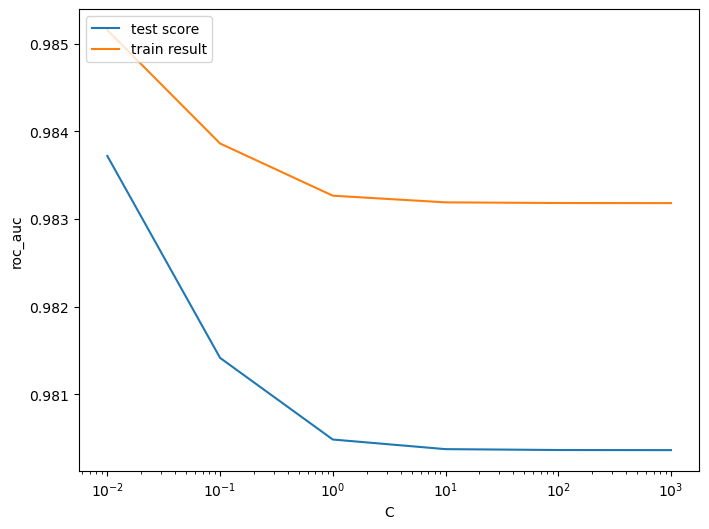

In [27]:
# plot of c versus train and validation scores

plt.figure(figsize=(8,6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test score', 'train result'], loc='upper left')
plt.xscale('log')

In [28]:
# Best score with C
best_score = model_cv.best_score_
best_c = model_cv.best_params_['C']
print(" The highest test roc_auc is {0} at C = {1}".format(best_score,best_c))

 The highest test roc_auc is 0.9837192853831933 at C = 0.01


**Logistic Regression with optional C**

In [29]:
# Instantiation the model with best C
logistic_imb = LogisticRegression(C=0.01)

#Fit the model on train set
logistic_imb_model = logistic_imb.fit(X_train,y_train)

Prediction on Train Set

In [30]:
# PREDICT ON TEST SET
y_train_predict = logistic_imb_model.predict(X_train)

In [31]:
def confusionMatrix(train,predict):
    confussion = metrics.confusion_matrix(train,predict)
    TP = confussion[1,1] # true positive
    TN = confussion[0,0] # true negative
    FP = confussion[0,1] # false positive
    FN = confussion[1,0] # false negative

    result = {
        "Confussion Matrix":{
            "True Positive":TP,
            "True Negative":TN,
            "False Positive":FP,
            "False Negative":FN
        },
        "Accuracy":metrics.accuracy_score(train,predict),
        "Sensitivity":TP/float(TP+FN),
        "Specificity":TN/float(TN+FP),
        "F1 score":f1_score(train,predict)
        
    }
    return result

In [32]:
print(confusionMatrix(y_train,y_train_predict))

{'Confussion Matrix': {'True Positive': 261, 'True Negative': 227427, 'False Positive': 22, 'False Negative': 135}, 'Accuracy': 0.9993109350655051, 'Sensitivity': 0.6590909090909091, 'Specificity': 0.9999032750198946, 'F1 score': 0.7687776141384388}


In [33]:
#classification report
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



Roc on train set

In [34]:
# Roc curve function
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'%auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

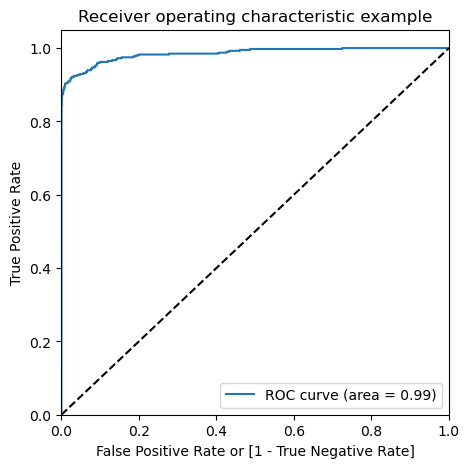

In [35]:
# Pridict Probability
y_train_predict_prob = logistic_imb_model.predict_proba(X_train)[:,1]

#Plot ROC curve
draw_roc(y_train,y_train_predict_prob)

We achieved very good ROC curve 0.98 on the train set

Predict on the test set

In [36]:
# Predict on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [37]:
print(confusionMatrix(y_test,y_test_pred))

{'Confussion Matrix': {'True Positive': 54, 'True Negative': 56850, 'False Positive': 16, 'False Negative': 42}, 'Accuracy': 0.9989817773252344, 'Sensitivity': 0.5625, 'Specificity': 0.9997186367952731, 'F1 score': 0.6506024096385543}


In [38]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



ROC on test set

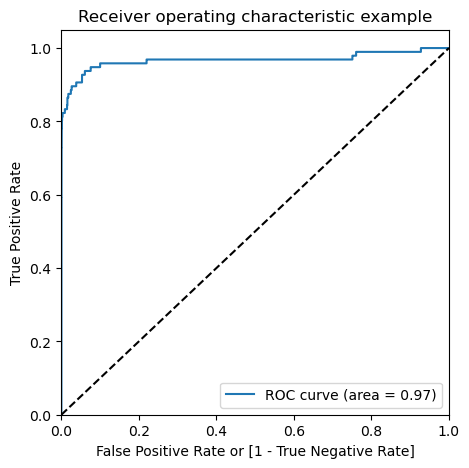

In [39]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

**Model summary**

1. Train set

    Accuracy: 0.999297768219623

    Sensitivity: 0.6515151515151515

    Specificity: 0.9999032750198946

    F1 score: 0.7633136094674556

    ROC : 0.99

2. Test Set

    Accuracy:- 0.9989817773252344

    Sensitivity:- 0.5625

    Specificity:- 0.9997186367952731

    F1-Score:- 0.6506024096385542

    ROC :0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.

**XGBOOST**

In [40]:
# Importing XGBoost
!pip install xgboost
from xgboost import XGBClassifier

Tunning the Hyperparameter

In [41]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]}

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [42]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.213667,0.129089,0.077591,0.001193,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.971504,0.972498,0.978483,0.974161,0.003082,2,0.999582,0.999761,0.999632,0.999658,0.000075
1,2.482972,0.293781,0.107933,0.031222,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.969237,0.978238,0.973924,0.973800,0.003676,3,0.999976,0.999969,0.999964,0.999970,0.000005
2,2.474369,0.142366,0.084863,0.014440,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977422,0.973420,0.977898,0.976247,0.002008,1,0.999960,0.999977,0.999954,0.999964,0.000010
3,2.578250,0.030639,0.079594,0.001410,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.959016,0.955137,0.967728,0.960627,0.005265,6,0.999993,0.999959,0.999988,0.999980,0.000015
4,2.387186,0.010249,0.093117,0.005748,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969186,0.962236,0.971101,0.967508,0.003809,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,2.375908,0.060702,0.079873,0.005945,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.968313,0.968930,0.977132,0.971458,0.004020,4,1.000000,1.000000,1.000000,1.000000,0.000000


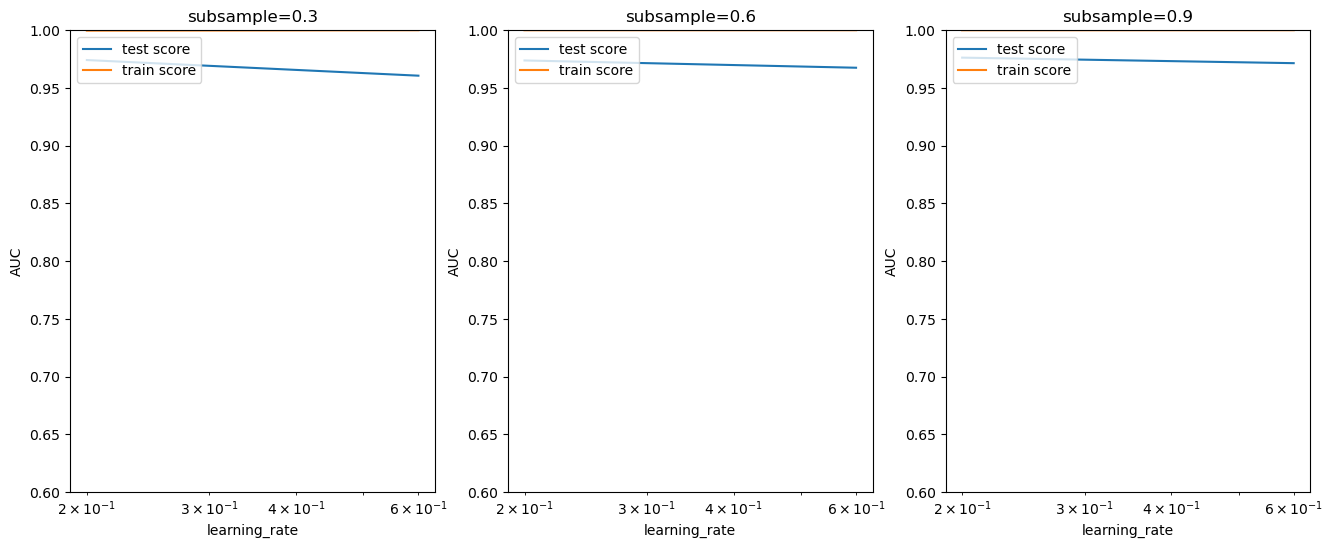

In [43]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [44]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [45]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

Prediction the train set

In [46]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)
print(confusionMatrix(y_train,y_train_pred))

{'Confussion Matrix': {'True Positive': 396, 'True Negative': 227449, 'False Positive': 0, 'False Negative': 0}, 'Accuracy': 1.0, 'Sensitivity': 1.0, 'Specificity': 1.0, 'F1 score': 1.0}


In [47]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



1.0


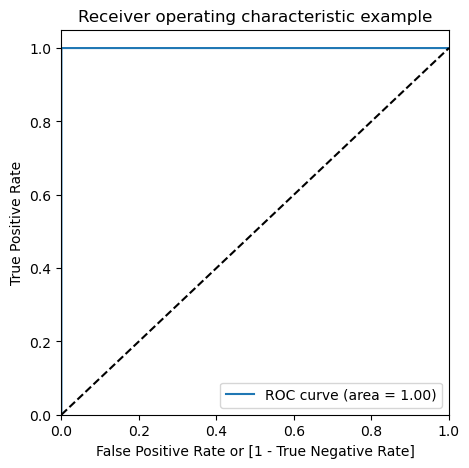

In [48]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
print(auc)

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

Prediction on the test set

In [49]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

print(confusionMatrix(y_test,y_test_pred))

{'Confussion Matrix': {'True Positive': 71, 'True Negative': 56858, 'False Positive': 8, 'False Negative': 25}, 'Accuracy': 0.999420666409185, 'Sensitivity': 0.7395833333333334, 'Specificity': 0.9998593183976365, 'F1 score': 0.8114285714285714}


In [50]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



0.9723599118981465


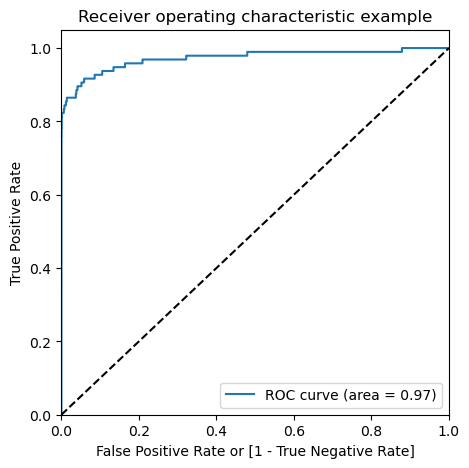

In [51]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)


**Model Summery**

1. Train Set

    Accuracy:- 1.0

    Sensitivity:- 1.0

    Specificity:- 1.0

    F1-Score:- 1.0

    ROC:- 1.0

2. Test Set

    Accuracy:- 0.999420666409185

    Sensitivity:- 0.74

    Specificity:- 0.9998593183976365

    F1-Score:- 0.8114285714285714

    ROC:- 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.

**Decision Tree**

In [52]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [53]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.381097,0.093190,0.027502,0.003325,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923873,0.930130,0.004425,5
1,3.306141,0.037768,0.030315,0.002115,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923875,0.930132,0.004424,4
2,3.249531,0.048403,0.029311,0.001170,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
3,3.447524,0.037469,0.029613,0.001740,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
4,6.469617,0.017422,0.031066,0.000773,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917498,0.923908,0.937990,0.926466,0.008559,6
5,6.347665,0.059684,0.024668,0.004665,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917504,0.916490,0.938019,0.924004,0.009919,8
6,6.437890,0.369170,0.031329,0.004533,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933443,0.919661,0.944089,0.932398,0.010000,3
7,6.154385,0.055720,0.028364,0.006866,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933461,0.919668,0.921760,0.924963,0.006069,7


In [54]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [55]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

Prediction on the train set

In [56]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

print(confusionMatrix(y_train,y_train))

{'Confussion Matrix': {'True Positive': 396, 'True Negative': 227449, 'False Positive': 0, 'False Negative': 0}, 'Accuracy': 1.0, 'Sensitivity': 1.0, 'Specificity': 1.0, 'F1 score': 1.0}


In [57]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



0.9534547393930157


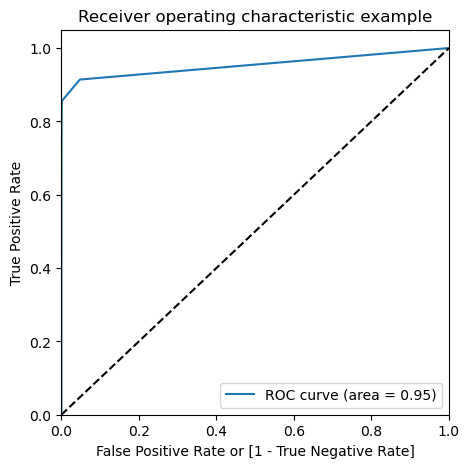

In [58]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Prediction on the test set

In [59]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

print(confusionMatrix(y_test,y_test_pred))

{'Confussion Matrix': {'True Positive': 56, 'True Negative': 56836, 'False Positive': 30, 'False Negative': 40}, 'Accuracy': 0.9987711105649381, 'Sensitivity': 0.5833333333333334, 'Specificity': 0.9994724439911371, 'F1 score': 0.6153846153846155}


In [60]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



0.92174979703748


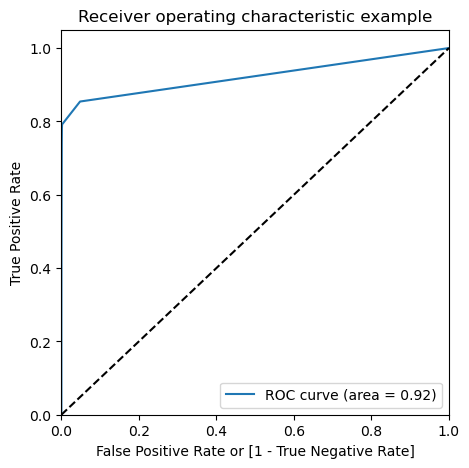

In [61]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model Summary**

1. Train Set

    Accuracy:- 0.9991704887094297

    Sensitivity:- 1.0

    Specificity:- 1.0

    F1-Score:- 0.749003984063745

    ROC:- 0.95


2. Test Set

    Accuracy:- 0.9987711105649381

    Sensitivity:- 0.5833333333333334

    Specificity:- 0.9994724439911371

    F1-Score:- 0.749003984063745

    ROC:- 0.92


**Random Forest**

In [62]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid with fewer options if possible
param_dist = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100, 200, 300],
    'max_features': [10, 20]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the random search model
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Adjust the number of iterations to control the search space
    cv=2,
    n_jobs=-1,
    verbose=1,
    return_train_score=True,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'max_features': [10, 20],
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50),
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, return_train_score=True, verbose=1)

In [63]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.9992933791361419 using {'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_features': 10, 'max_depth': 10}


In [64]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

Prediction on the train set

In [65]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

print(confusionMatrix(y_train,y_train))

{'Confussion Matrix': {'True Positive': 396, 'True Negative': 227449, 'False Positive': 0, 'False Negative': 0}, 'Accuracy': 1.0, 'Sensitivity': 1.0, 'Specificity': 1.0, 'F1 score': 1.0}


In [66]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.89      0.73      0.80       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



0.9794672418738692


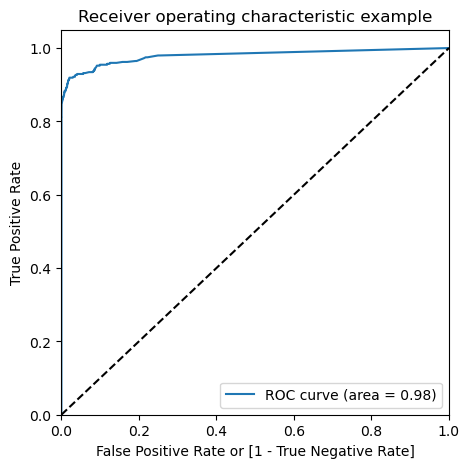

In [67]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

Prediction on the test set

In [68]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

print(confusionMatrix(y_test,y_test_pred))

{'Confussion Matrix': {'True Positive': 60, 'True Negative': 56846, 'False Positive': 20, 'False Negative': 36}, 'Accuracy': 0.9990168884519505, 'Sensitivity': 0.625, 'Specificity': 0.9996482959940913, 'F1 score': 0.6818181818181818}


In [69]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.75      0.62      0.68        96

    accuracy                           1.00     56962
   macro avg       0.87      0.81      0.84     56962
weighted avg       1.00      1.00      1.00     56962



0.9622058325713081


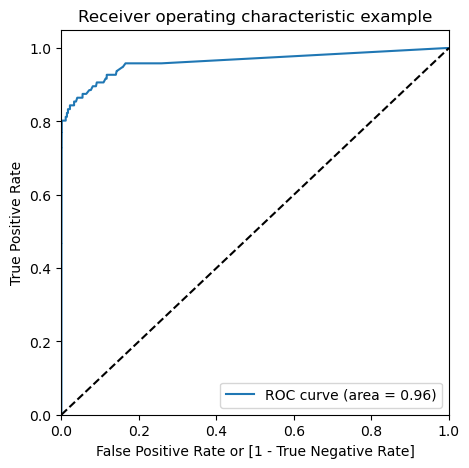

In [70]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

1. Train set
    
    Accuracy = 0.99

    Sensitivity = 1.0

    Specificity = 1.0

    F1-Score = 0.80

    ROC-AUC = 0.98


2. Test set
    Accuracy = 0.99

    Sensitivity = 0.62

    Specificity = 0.99

    F-1 Score = 0.75

    ROC-AUC = 0.96

**Choosing best model on the imbalanced data**

We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as XGBoost, which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. But XGBoost having ROC score 0.98, which is 0.01 more than the Logistic model. The 0.01 increase of score may convert into huge amount of saving for the bank.

**Print the important features of the best model to understand the dataset**
1. This will not give much explanation on the already transformed dataset
2. But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


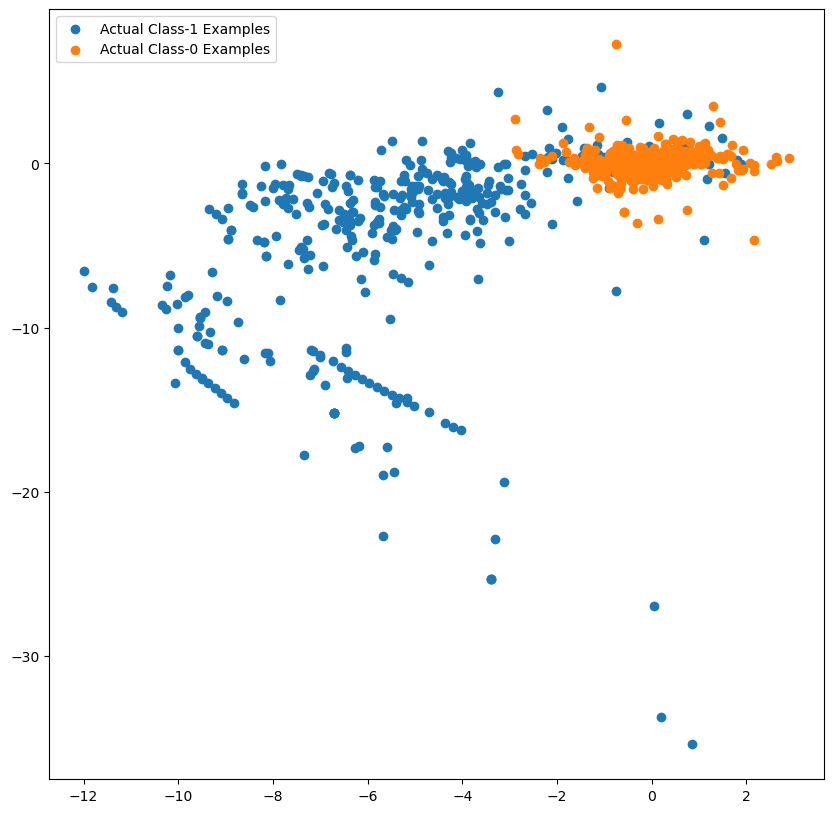

In [71]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [72]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.82052475


We can see that the threshold is 0.82, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

**Handling data imbalance**

As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

Undersampling :- Here for balancing the class distribution, the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)
Oversampling :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.
Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

**Undersampling**

In [73]:
# Importing undersampler library
#!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# instantiating the random undersampler 
rus = RandomUnderSampler()

# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


**Model building on balanced data with Undersampling**

**Logistic Regression**

In [74]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [75]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009585,0.006115,0.003107,0.000213,0.01,{'C': 0.01},0.986486,0.996676,0.979647,0.982844,0.987913,0.986713,0.005756,1,0.991512,0.989688,0.992954,0.991242,0.990851,0.991250,0.001056
1,0.006000,0.001868,0.002232,0.000739,0.1,{'C': 0.1},0.983943,0.996043,0.980769,0.977072,0.987107,0.984987,0.006454,2,0.992880,0.991474,0.994328,0.992954,0.992763,0.992880,0.000904
2,0.009229,0.003142,0.003228,0.000781,1,{'C': 1},0.980127,0.996043,0.973878,0.970819,0.986301,0.981434,0.009040,3,0.993359,0.992682,0.995124,0.993949,0.993798,0.993783,0.000802
3,0.010676,0.001133,0.003006,0.000007,10,{'C': 10},0.972973,0.995252,0.966667,0.967292,0.987429,0.977923,0.011444,4,0.994258,0.992842,0.995711,0.994357,0.993947,0.994223,0.000918
4,0.013002,0.002600,0.003002,0.000003,100,{'C': 100},0.970747,0.995093,0.962660,0.967452,0.987913,0.976773,0.012507,5,0.994338,0.992912,0.995751,0.994775,0.993947,0.994345,0.000935
5,0.011775,0.003639,0.002612,0.000450,1000,{'C': 1000},0.969952,0.994935,0.962179,0.967613,0.988074,0.976551,0.012655,6,0.994318,0.992872,0.995771,0.994875,0.993928,0.994353,0.000965


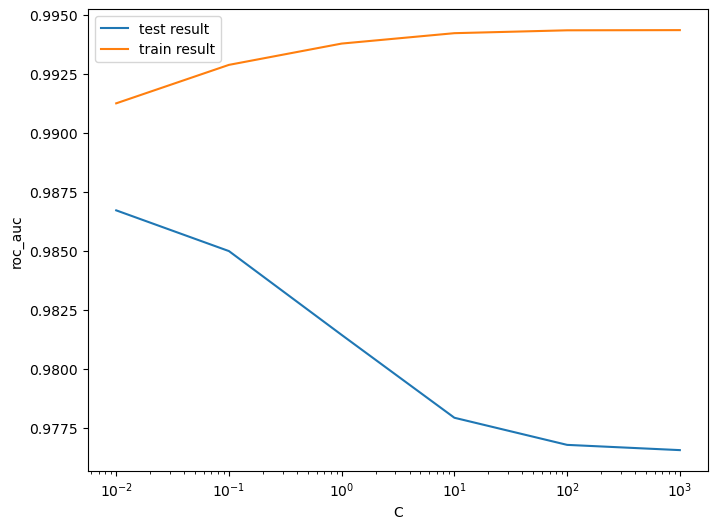

In [76]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [77]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9867134750625887 at C = 0.01


Logistic regression with optimal C

In [78]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

Prediction on the train set

In [79]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

print(confusionMatrix(y_train_rus,y_train_pred))

{'Confussion Matrix': {'True Positive': 366, 'True Negative': 388, 'False Positive': 8, 'False Negative': 30}, 'Accuracy': 0.952020202020202, 'Sensitivity': 0.9242424242424242, 'Specificity': 0.9797979797979798, 'F1 score': 0.9506493506493506}


In [80]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       396
           1       0.98      0.92      0.95       396

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



0.9925390266299357


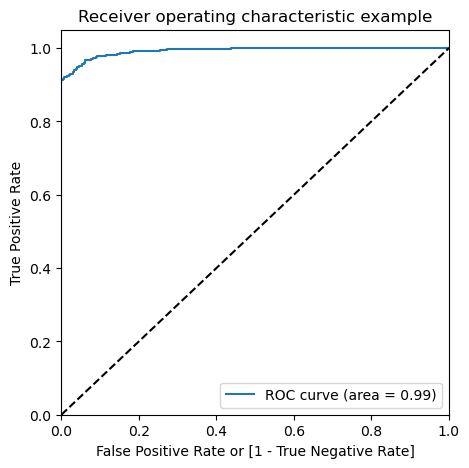

In [81]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set

In [82]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

print(confusionMatrix(y_test,y_test_pred))

{'Confussion Matrix': {'True Positive': 83, 'True Negative': 55256, 'False Positive': 1610, 'False Negative': 13}, 'Accuracy': 0.9715073206699203, 'Sensitivity': 0.8645833333333334, 'Specificity': 0.9716878275243555, 'F1 score': 0.09278926774734489}


In [83]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.05      0.86      0.09        96

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



0.9641265577556595


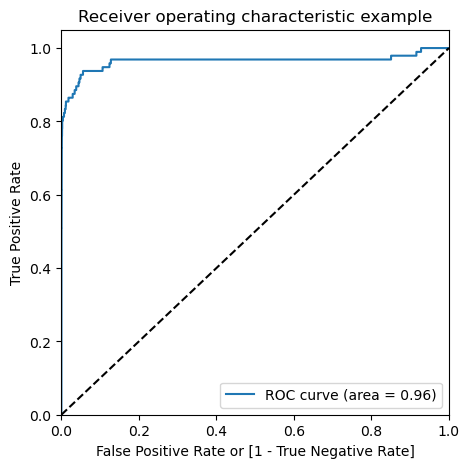

In [84]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

1. Train set
    Accuracy:- 0.9494949494949495

    Sensitivity:- 0.9166666666666666

    Specificity:- 0.9823232323232324

    F1-Score:- 0.9477806788511749

    ROC = 0.99
2. Test set

    Accuracy:- 0.9805835469260209

    Sensitivity:- 0.8645833333333334

    Specificity:- 0.9807793760770935

    ROC = 0.96

**XGBoost**

In [85]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [86]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.109753,0.022632,0.011001,0.000816,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.977904,0.979626,0.984848,0.980793,0.002953,1,0.999842,0.999914,1.0,0.999919,0.000065
1,0.082000,0.003558,0.011334,0.001248,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.974805,0.974403,0.988005,0.979071,0.006319,2,1.000000,1.000000,1.0,1.000000,0.000000
2,0.082000,0.000816,0.010333,0.000472,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977904,0.972567,0.985595,0.978688,0.005348,3,1.000000,1.000000,1.0,1.000000,0.000000
3,0.077332,0.012659,0.010000,0.002160,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.970328,0.968033,0.975781,0.971380,0.003249,6,0.999971,1.000000,1.0,0.999990,0.000014
4,0.112277,0.006563,0.014329,0.001249,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.967172,0.974633,0.982897,0.974901,0.006423,4,1.000000,1.000000,1.0,1.000000,0.000000
5,0.204673,0.049524,0.020999,0.004321,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.969984,0.968607,0.985250,0.974614,0.007542,5,1.000000,1.000000,1.0,1.000000,0.000000


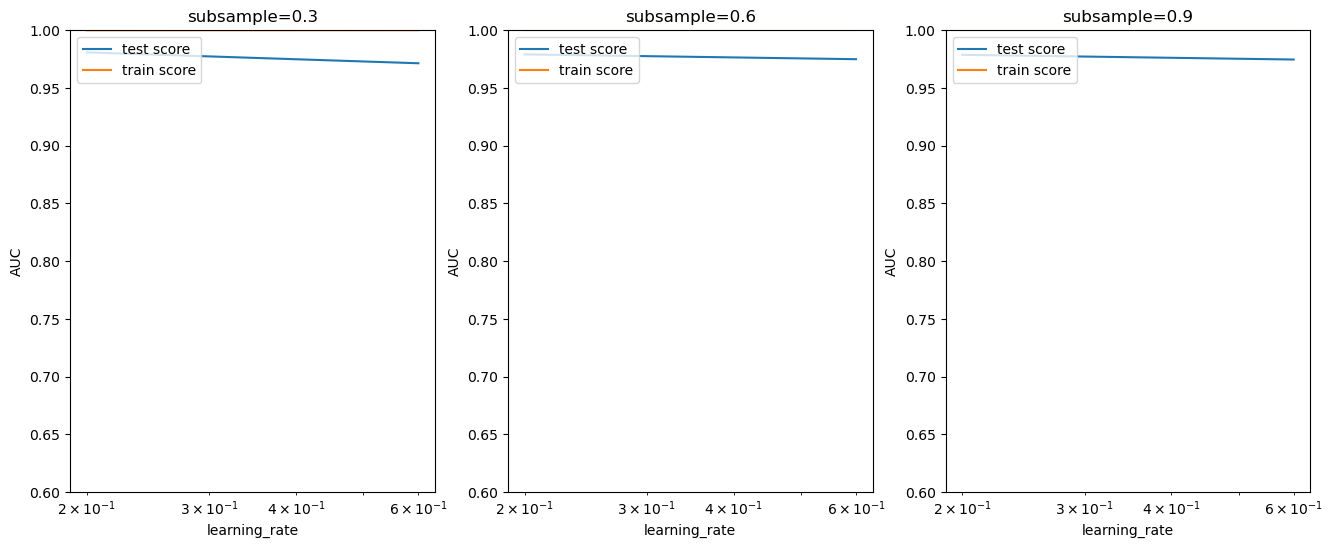

In [87]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [88]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [89]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

Prediction on the train set

In [90]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

print(confusionMatrix(y_train_rus,y_train_rus))

{'Confussion Matrix': {'True Positive': 396, 'True Negative': 396, 'False Positive': 0, 'False Negative': 0}, 'Accuracy': 1.0, 'Sensitivity': 1.0, 'Specificity': 1.0, 'F1 score': 1.0}


In [91]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



1.0


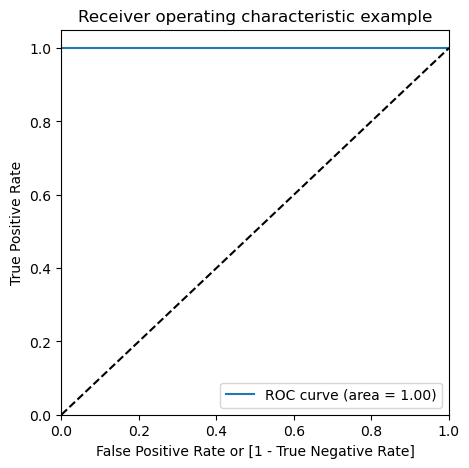

In [92]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set

In [93]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

print(confusionMatrix(y_test,y_test_pred))

{'Confussion Matrix': {'True Positive': 88, 'True Negative': 54253, 'False Positive': 2613, 'False Negative': 8}, 'Accuracy': 0.9539868684386082, 'Sensitivity': 0.9166666666666666, 'Specificity': 0.9540498716280379, 'F1 score': 0.06292456203074723}


In [94]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56866
           1       0.03      0.92      0.06        96

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.97     56962



0.9782064414588681


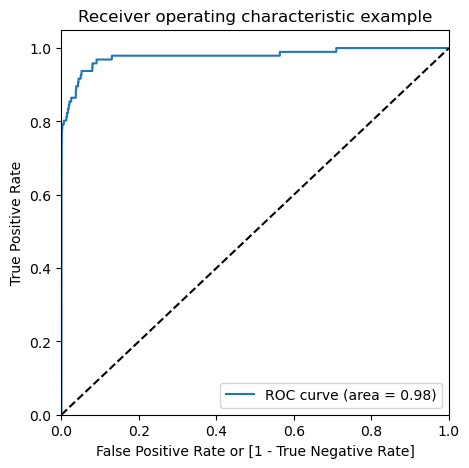

In [95]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Modul Summery**

1. Train Set
    Accuracy:- 1.0
    
    Sensitivity:- 1.0
    
    Specificity:- 1.0

    ROC:- 1.0
2. Test Set

    Accuracy:- 0.9653979846213265
    
    Sensitivity:- 0.90625
    
    Specificity:- 0.9654978370203636

    ROC:- 0.98

**Decision Tree**

In [96]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [97]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011042,0.001096,0.006060,0.000826,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.955492,0.966540,0.965593,0.962542,0.005000,2
1,0.009610,0.000521,0.004060,0.000040,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.956009,0.966196,0.964962,0.962389,0.004539,3
2,0.007995,0.000029,0.005154,0.000987,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.951331,0.964733,0.965852,0.960639,0.006597,7
3,0.007541,0.000697,0.003991,0.000006,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.954660,0.965335,0.965622,0.961873,0.005101,4
4,0.009670,0.001707,0.003330,0.000478,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.956095,0.963499,0.965708,0.961767,0.004111,5
5,0.008956,0.000051,0.003702,0.000454,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.956095,0.966110,0.965708,0.962638,0.004629,1
6,0.008001,0.000820,0.004018,0.000842,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.954919,0.964733,0.964933,0.961528,0.004674,6
7,0.007272,0.000513,0.003376,0.000447,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.947831,0.964388,0.965852,0.959357,0.008172,8


In [98]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9626377410468319
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [99]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

Prediction on the train set

In [100]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

print(confusionMatrix(y_train_rus, y_train_pred))

{'Confussion Matrix': {'True Positive': 349, 'True Negative': 389, 'False Positive': 7, 'False Negative': 47}, 'Accuracy': 0.9318181818181818, 'Sensitivity': 0.8813131313131313, 'Specificity': 0.9823232323232324, 'F1 score': 0.928191489361702}


In [101]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       396
           1       0.98      0.88      0.93       396

    accuracy                           0.93       792
   macro avg       0.94      0.93      0.93       792
weighted avg       0.94      0.93      0.93       792



0.9834136822773186


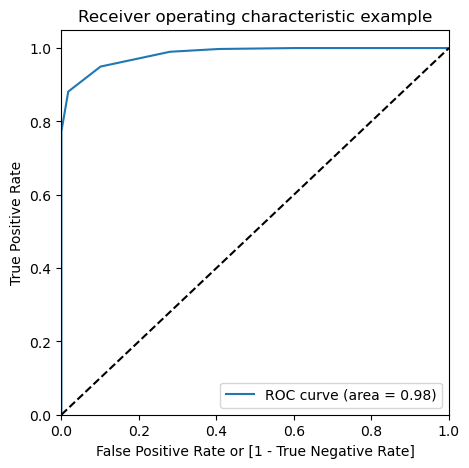

In [102]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set

In [103]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

print(confusionMatrix(y_test,y_test_pred))

{'Confussion Matrix': {'True Positive': 80, 'True Negative': 55109, 'False Positive': 1757, 'False Negative': 16}, 'Accuracy': 0.9688739861662161, 'Sensitivity': 0.8333333333333334, 'Specificity': 0.9691028030809271, 'F1 score': 0.08277289187790998}


In [104]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.83      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.97      0.98     56962



0.9573046907056355


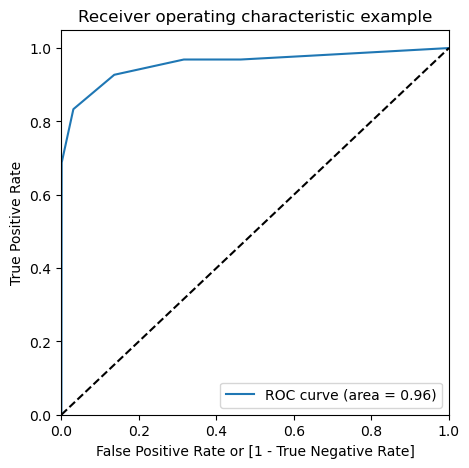

In [105]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

1. Train set
    
    Accuracy = 0.93

    Sensitivity = 0.88
    
    Specificity = 0.97
    
    ROC-AUC = 0.98
    
2. Test set
    
    Accuracy = 0.96
    
    Sensitivity = 0.85
    
    Specificity = 0.96
    
    ROC-AUC = 0.96

**Random forest**

In [106]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [107]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9799000102030406 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 200}


In [108]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

Prediction on the train set

In [109]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [110]:
print(confusionMatrix(y_train_rus, y_train_pred))

{'Confussion Matrix': {'True Positive': 355, 'True Negative': 392, 'False Positive': 4, 'False Negative': 41}, 'Accuracy': 0.9431818181818182, 'Sensitivity': 0.8964646464646465, 'Specificity': 0.98989898989899, 'F1 score': 0.9403973509933775}


In [111]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       396
           1       0.99      0.90      0.94       396

    accuracy                           0.94       792
   macro avg       0.95      0.94      0.94       792
weighted avg       0.95      0.94      0.94       792



0.987775482093664


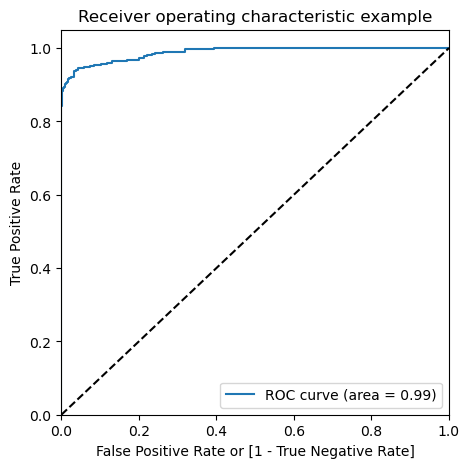

In [112]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set

In [113]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

print(confusionMatrix(y_test, y_test_pred))

{'Confussion Matrix': {'True Positive': 82, 'True Negative': 55519, 'False Positive': 1347, 'False Negative': 14}, 'Accuracy': 0.9761068782697236, 'Sensitivity': 0.8541666666666666, 'Specificity': 0.976312735202054, 'F1 score': 0.10754098360655738}


In [114]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.85      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



0.9755666464436863


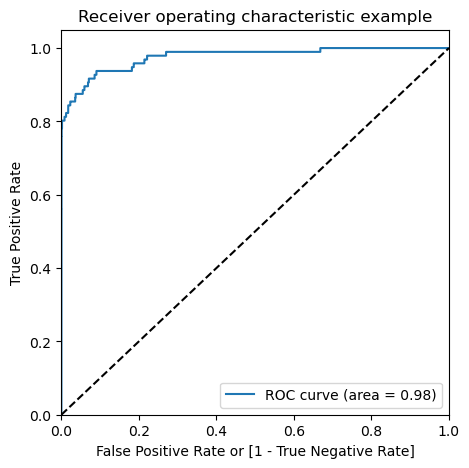

In [115]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

1. Train set

    Accuracy = 0.94 

    Sensitivity = 0.89 

    Specificity = 0.98 

    ROC-AUC = 0.98 

2. Test set

    Accuracy = 0.98 

    Sensitivity = 0.83 

    Specificity = 0.98 

    ROC-AUC = 0.97 

**Oversampling**

In [116]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


**Logistic Regression**

In [117]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [118]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.644809,0.380752,0.062480,0.012488,0.01,{'C': 0.01},0.988681,0.988571,0.988185,0.988785,0.988469,0.988538,0.000206,6,0.988557,0.988506,0.988579,0.988604,0.988525,0.988554,0.000035
1,1.443602,0.173480,0.052846,0.002810,0.1,{'C': 0.1},0.988693,0.988590,0.988196,0.988783,0.988488,0.988550,0.000203,1,0.988569,0.988517,0.988587,0.988613,0.988535,0.988564,0.000035
2,1.314464,0.056717,0.060782,0.009385,1,{'C': 1},0.988692,0.988591,0.988196,0.988780,0.988485,0.988549,0.000202,5,0.988571,0.988517,0.988586,0.988613,0.988535,0.988565,0.000035
3,1.782136,0.515042,0.068756,0.019089,10,{'C': 10},0.988693,0.988592,0.988196,0.988780,0.988485,0.988549,0.000202,2,0.988571,0.988517,0.988586,0.988613,0.988536,0.988565,0.000035
4,1.525978,0.290605,0.065233,0.020144,100,{'C': 100},0.988693,0.988592,0.988196,0.988780,0.988485,0.988549,0.000202,4,0.988571,0.988517,0.988586,0.988613,0.988536,0.988565,0.000034
5,1.127255,0.079997,0.050374,0.008165,1000,{'C': 1000},0.988693,0.988592,0.988196,0.988780,0.988485,0.988549,0.000202,3,0.988571,0.988517,0.988586,0.988613,0.988536,0.988565,0.000034


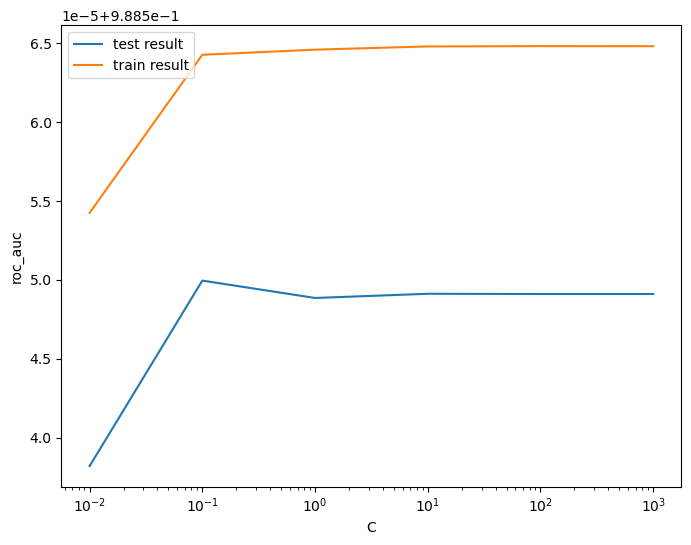

In [119]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [120]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9885499584222902 at C = 0.1


Logistic regression with optimal C

In [121]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

Prediction on the train set

In [122]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

print(confusionMatrix(y_train_ros, y_train_pred))

{'Confussion Matrix': {'True Positive': 209653, 'True Negative': 222275, 'False Positive': 5174, 'False Negative': 17796}, 'Accuracy': 0.9495051637949606, 'Sensitivity': 0.9217582842747165, 'Specificity': 0.9772520433152048, 'F1 score': 0.948064104767159}


In [123]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



0.9885601844479668


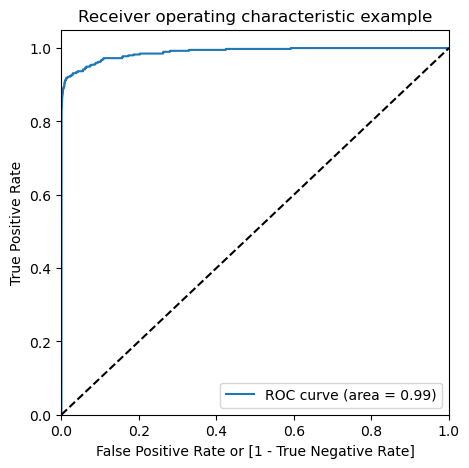

In [124]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

Prediction on the test set

In [125]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

print(confusionMatrix(y_test, y_test_pred))

{'Confussion Matrix': {'True Positive': 85, 'True Negative': 55532, 'False Positive': 1334, 'False Negative': 11}, 'Accuracy': 0.9763877672834521, 'Sensitivity': 0.8854166666666666, 'Specificity': 0.9765413428058946, 'F1 score': 0.11221122112211222}


In [126]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



0.9711310544379184


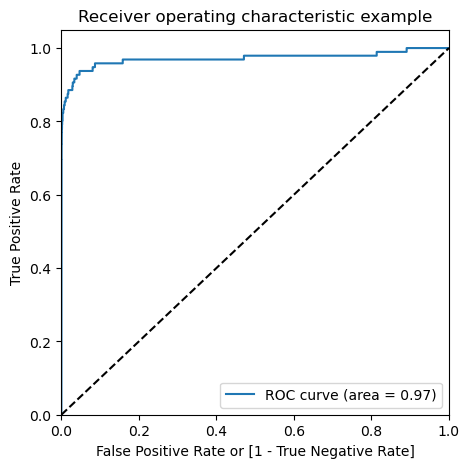

In [127]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

1. Train set
    
    Accuracy:- 0.9496040870700685
    
    Sensitivity:- 0.9220132864949945
    
    Specificity:- 0.9771948876451424
    
    F1-Score:- 0.9481741709562854

    ROC: 0.99

2. Test set
    Accuracy:- 0.9764755451002423

    Sensitivity:- 0.8854166666666666
    
    Specificity:- 0.9766292688073717
    
    ROC = 0.97


**XGBoost**

In [128]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [129]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.876645,0.172949,0.198341,0.007801,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999893,0.999914,0.999896,0.999901,0.000009,5,0.999904,0.999919,0.999914,0.999913,0.000006
1,5.115232,0.398587,0.169288,0.011181,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999907,0.999915,0.999900,0.999907,0.000006,4,0.999918,0.999916,0.999910,0.999915,0.000003
2,4.925634,0.551860,0.169246,0.011064,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999888,0.999915,0.999897,0.999900,0.000011,6,0.999908,0.999914,0.999919,0.999914,0.000005
3,4.781136,0.179534,0.169177,0.014897,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999985,0.999985,0.999970,0.999980,0.000007,3,0.999994,0.999999,0.999995,0.999996,0.000002
4,4.790150,0.050587,0.151164,0.005386,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999993,0.999984,0.999976,0.999984,0.000007,1,1.000000,0.999997,1.000000,0.999999,0.000001
5,4.553272,0.051156,0.161668,0.007630,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999989,0.999979,0.999973,0.999981,0.000006,2,0.999996,0.999995,1.000000,0.999997,0.000002


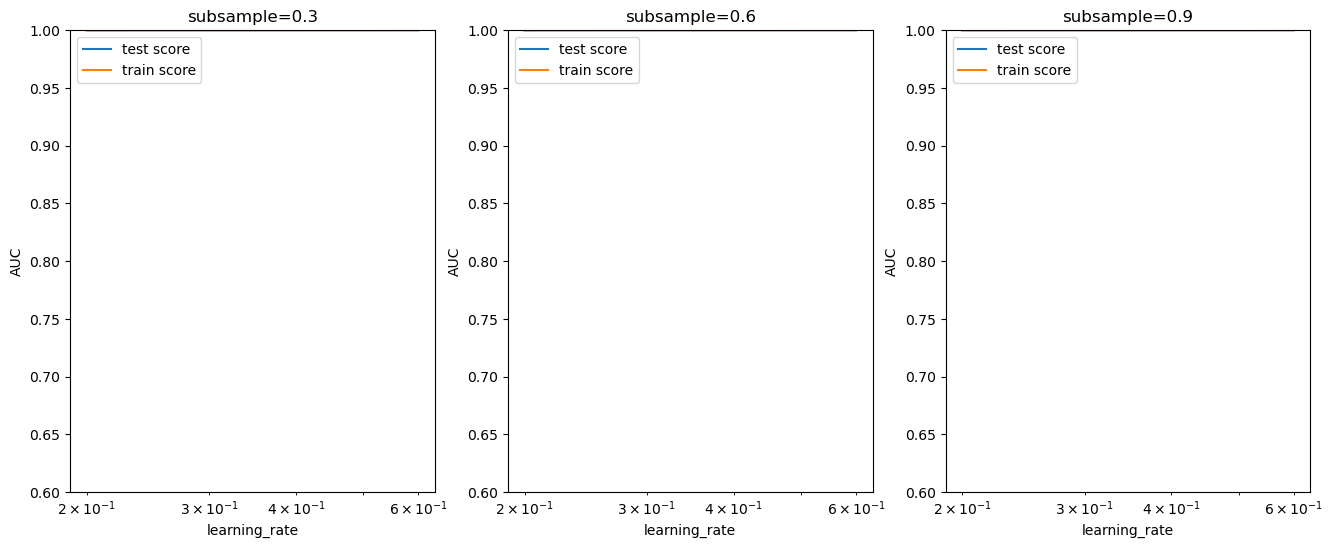

In [130]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

**Model with optimal hyperparameters**

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [131]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [132]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

Prediction on the train set

In [133]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

print(confusionMatrix(y_train_ros, y_train_ros))

{'Confussion Matrix': {'True Positive': 227449, 'True Negative': 227449, 'False Positive': 0, 'False Negative': 0}, 'Accuracy': 1.0, 'Sensitivity': 1.0, 'Specificity': 1.0, 'F1 score': 1.0}


In [134]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



1.0


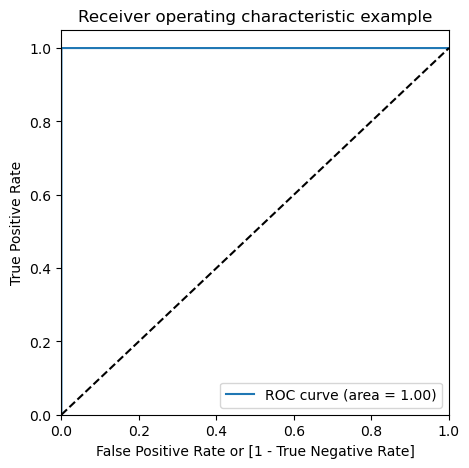

In [135]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

Prediction on the test set

In [136]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

print(confusionMatrix(y_test, y_test_pred))

{'Confussion Matrix': {'True Positive': 75, 'True Negative': 56855, 'False Positive': 11, 'False Negative': 21}, 'Accuracy': 0.9994382219725431, 'Sensitivity': 0.78125, 'Specificity': 0.9998065627967503, 'F1 score': 0.8241758241758241}


In [137]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.87      0.78      0.82        96

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



0.9772612369429888


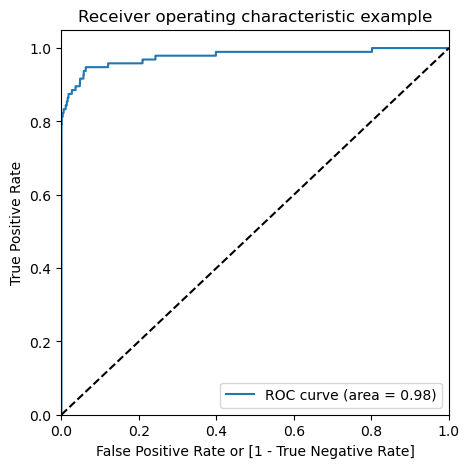

In [138]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

1. Train set

    Accuracy:- 1.0
    
    Sensitivity:- 1.0
    
    Specificity:- 1.0

    ROC: 1.0
   
2. Test set
    Accuracy:- 0.9993679997191109

    Sensitivity:- 0.7604166666666666
    
    Specificity:- 0.9997713923961594

    ROC: 0.97

**Decision Tree**

In [139]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [140]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.579325,0.050101,0.074080,0.007389,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990234,0.991328,0.990800,0.990788,0.000447,5
1,4.719082,0.141098,0.070928,0.008713,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990216,0.991328,0.990815,0.990786,0.000454,6
2,4.811369,0.165057,0.073502,0.001212,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990175,0.991247,0.990596,0.990673,0.000441,7
3,4.707729,0.071814,0.073686,0.003313,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990175,0.991247,0.990596,0.990673,0.000441,7
4,7.273553,0.376420,0.073708,0.004141,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999573,0.999608,0.999680,0.999620,0.000045,2
5,7.200628,0.289800,0.076284,0.010758,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999586,0.999632,0.999648,0.999622,0.000026,1
6,7.371812,0.437114,0.068615,0.014632,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999622,0.999625,0.999514,0.999587,0.000051,3
7,7.136179,0.363348,0.079479,0.011764,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999599,0.999647,0.999477,0.999574,0.000071,4


In [141]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.99962170021882
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [142]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

Prediction on the train set

In [143]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

print(confusionMatrix(y_train_ros, y_train_pred))

{'Confussion Matrix': {'True Positive': 227449, 'True Negative': 225943, 'False Positive': 1506, 'False Negative': 0}, 'Accuracy': 0.9966893677263914, 'Sensitivity': 1.0, 'Specificity': 0.9933787354527828, 'F1 score': 0.9967002918466973}


In [144]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



0.9997736673356206


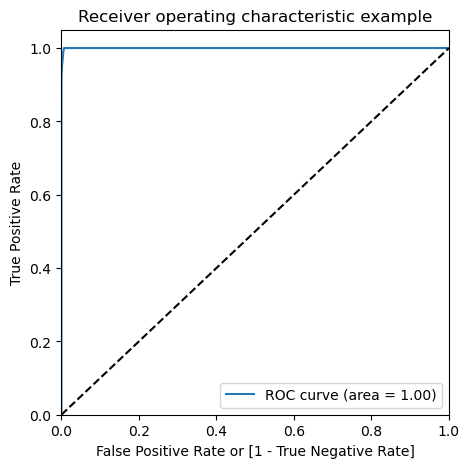

In [145]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

Prediction on the test set

In [146]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

print(confusionMatrix(y_test, y_test_pred))

{'Confussion Matrix': {'True Positive': 75, 'True Negative': 56442, 'False Positive': 424, 'False Negative': 21}, 'Accuracy': 0.9921877743056775, 'Sensitivity': 0.78125, 'Specificity': 0.9925438750747371, 'F1 score': 0.25210084033613445}


In [147]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.78      0.25        96

    accuracy                           0.99     56962
   macro avg       0.57      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962



0.889635099766703


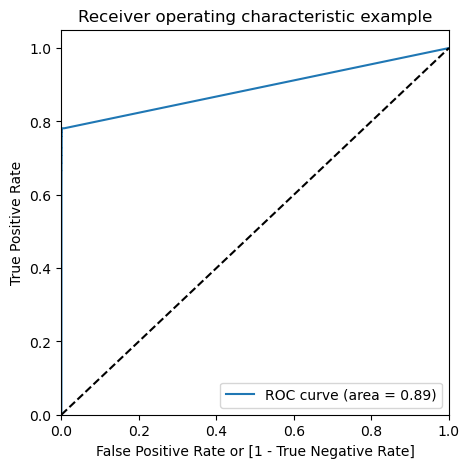

In [148]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Modul Summary**

1. Train set

    Accuracy:- 0.9966739796613746
    
    Sensitivity:- 1.0
    
    Specificity:- 0.9933479593227493

    ROC:- 1.0

2. Test set

    Accuracy:- 0.992538885572838
    
    Sensitivity:- 0.78125
    
    Specificity:- 0.9928955790806457

    ROC:- 0.89

**SMOTE (Synthetic Minority Oversampling Technique)**

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [149]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=27)

# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


**Logistic Regression**

In [150]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [151]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.229733,0.058048,0.062637,0.006528,0.01,{'C': 0.01},0.989805,0.989796,0.989484,0.989631,0.989910,0.989725,0.000150,6,0.989758,0.989666,0.989760,0.989841,0.989682,0.989741,0.000063
1,1.118843,0.035223,0.059223,0.005730,0.1,{'C': 0.1},0.989834,0.989807,0.989488,0.989632,0.989942,0.989741,0.000161,1,0.989780,0.989686,0.989772,0.989853,0.989700,0.989758,0.000060
2,1.116093,0.048796,0.061591,0.011745,1,{'C': 1},0.989836,0.989807,0.989486,0.989630,0.989944,0.989741,0.000162,2,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
3,1.116101,0.034808,0.056897,0.009373,10,{'C': 10},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,5,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
4,1.121367,0.013904,0.050533,0.003478,100,{'C': 100},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,3,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
5,1.103599,0.038323,0.063591,0.009300,1000,{'C': 1000},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,4,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060


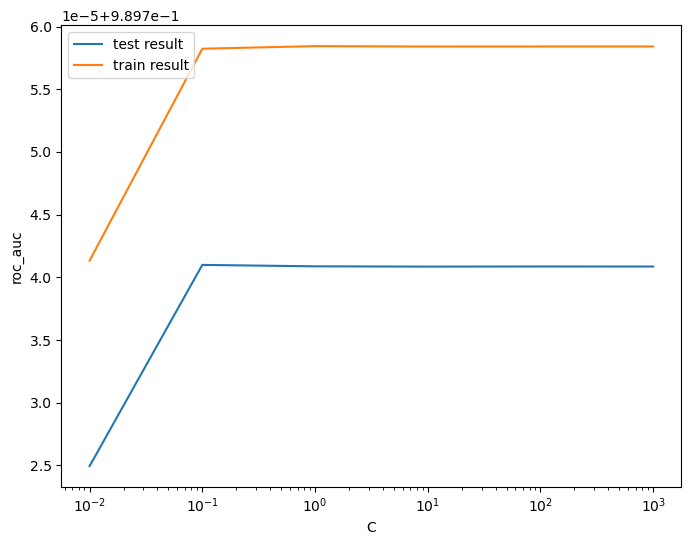

In [152]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [153]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


**Logistic regression with optimal C**

In [154]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

Prediction on the train set

In [155]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

print(confusionMatrix(y_train_smote, y_train_pred))

{'Confussion Matrix': {'True Positive': 209756, 'True Negative': 221911, 'False Positive': 5538, 'False Negative': 17693}, 'Accuracy': 0.9489314087993352, 'Sensitivity': 0.9222111330452102, 'Specificity': 0.9756516845534603, 'F1 score': 0.9475293793464833}


In [156]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [157]:
import pickle
with open('logistic_regression_smote.pkl', 'wb') as file:
    pickle.dump(logistic_bal_smote, file)

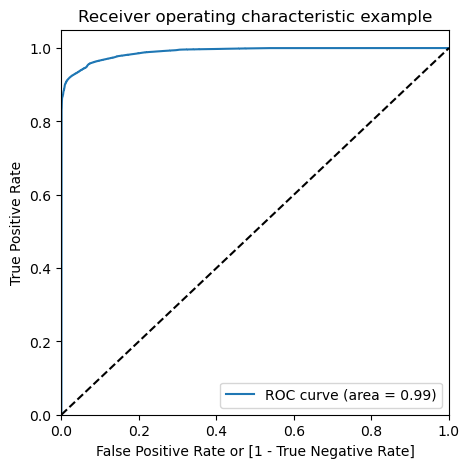

In [158]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

Prediction on the test set

In [159]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

print(confusionMatrix(y_test, y_test_pred))

{'Confussion Matrix': {'True Positive': 86, 'True Negative': 55416, 'False Positive': 1450, 'False Negative': 10}, 'Accuracy': 0.9743688774972789, 'Sensitivity': 0.8958333333333334, 'Specificity': 0.9745014595716245, 'F1 score': 0.1053921568627451}


In [160]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



ROC on the test set

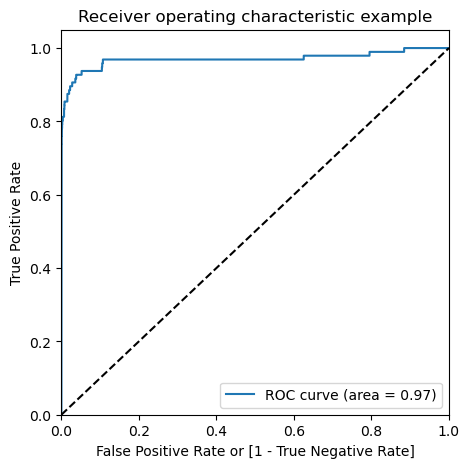

In [161]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model Summary**

1. Train Set

    Accuracy:- 0.9488918394892921
    
    Sensitivity:- 0.9222375125852389
    
    Specificity:- 0.9755461663933453

    ROC:- 0.99

2. Test Set

    Accuracy:- 0.9743688774972789
    
    Sensitivity:- 0.8958333333333334
    
    Specificity:- 0.9745014595716245

    ROC:- 0.97

**XGBoost**

In [162]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [163]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.958608,0.140368,0.105005,0.006480,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999680,0.999733,0.999688,0.999700,0.000023,4,0.999734,0.999717,0.999732,0.999728,7.836593e-06
1,2.744561,0.141186,0.098721,0.006132,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999638,0.999685,0.999643,0.999655,0.000021,6,0.999697,0.999665,0.999700,0.999687,1.564702e-05
2,3.108717,0.066620,0.135101,0.009971,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999653,0.999713,0.999666,0.999677,0.000026,5,0.999709,0.999690,0.999717,0.999705,1.139169e-05
3,3.505703,0.071504,0.127803,0.012085,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999946,0.999949,0.999958,0.999951,0.000005,3,0.999971,0.999976,0.999983,0.999976,4.730254e-06
4,3.592765,0.238312,0.122148,0.003767,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999962,0.999960,0.999948,0.999957,0.000006,1,0.999978,0.999980,0.999980,0.999979,1.054078e-06
5,3.390529,0.132445,0.168550,0.062186,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999961,0.999959,0.999947,0.999956,0.000006,2,0.999975,0.999976,0.999977,0.999976,8.060376e-07


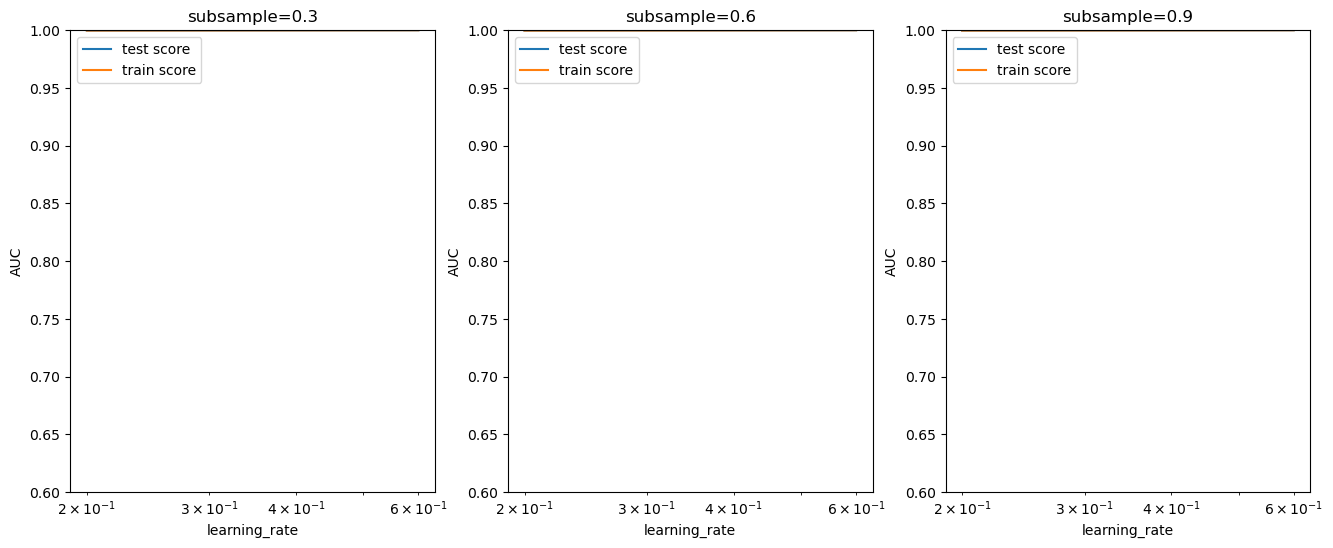

In [164]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

**Model with optimal hyperparameters**

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [165]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [166]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

Prediction on the train set

In [167]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

print(confusionMatrix(y_train_smote, y_train_pred))

{'Confussion Matrix': {'True Positive': 227449, 'True Negative': 227448, 'False Positive': 1, 'False Negative': 0}, 'Accuracy': 0.9999978017049976, 'Sensitivity': 1.0, 'Specificity': 0.9999956034099952, 'F1 score': 0.9999978017098301}


In [168]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



0.9999999890785479


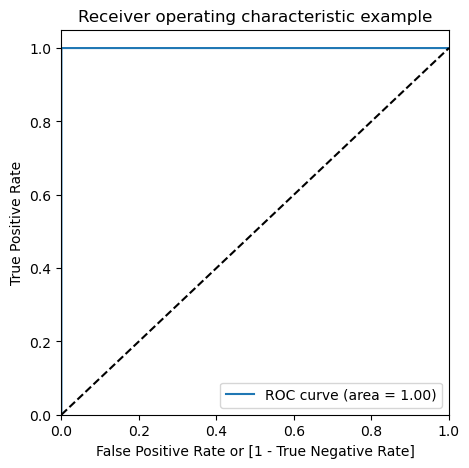

In [169]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)


Prediction on the test set

In [170]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

print(confusionMatrix(y_test, y_test_pred))

{'Confussion Matrix': {'True Positive': 76, 'True Negative': 56833, 'False Positive': 33, 'False Negative': 20}, 'Accuracy': 0.9990695551420246, 'Sensitivity': 0.7916666666666666, 'Specificity': 0.9994196883902507, 'F1 score': 0.7414634146341462}


In [171]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.79      0.74        96

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



0.9553290117703608


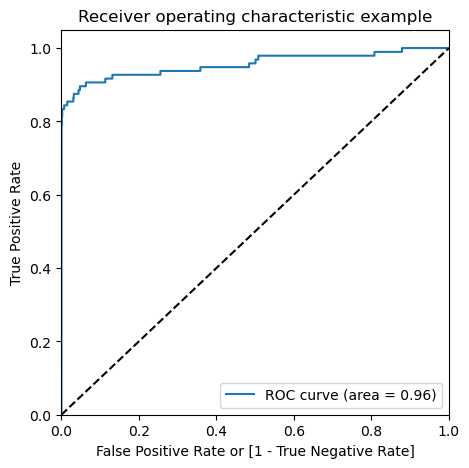

In [172]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model Summary**

1. Train set

    Accuracy:- 0.9999978017049976
    
    Sensitivity:- 1.0
    
    Specificity:- 0.9999956034099952

    ROC:1

2. Test set

    Accuracy:- 0.9990695551420246
    
    Sensitivity:- 0.7916666666666666
    
    Specificity:- 0.9994196883902507

    ROC: 0.96

Overall, the model is performing well in the test set, what it had learnt from the train set.

**Decision Tree**

In [173]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [174]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.465531,0.163477,0.070697,0.006184,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986127,0.985688,0.984839,0.985551,0.000535,5
1,6.450676,0.089335,0.062326,0.005189,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986116,0.985690,0.984839,0.985548,0.000531,6
2,6.438949,0.143421,0.063238,0.004493,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986060,0.985638,0.984773,0.985490,0.000536,8
3,6.637291,0.071791,0.066432,0.004141,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986064,0.985641,0.984773,0.985493,0.000537,7
4,11.689760,0.327466,0.062324,0.006981,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998135,0.998132,0.998034,0.998100,0.000047,1
5,11.542476,0.190759,0.060204,0.004267,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998113,0.998135,0.998005,0.998085,0.000057,2
6,12.374483,1.470694,0.068899,0.005241,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998063,0.998082,0.997973,0.998039,0.000047,4
7,13.894078,1.123406,0.086522,0.005387,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998099,0.998101,0.997918,0.998040,0.000086,3


In [175]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9981004434465454
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [176]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

Prediction on the train set

In [177]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

print(confusionMatrix(y_train_smote, y_train_pred))

{'Confussion Matrix': {'True Positive': 225075, 'True Negative': 223809, 'False Positive': 3640, 'False Negative': 2374}, 'Accuracy': 0.9867794538555896, 'Sensitivity': 0.9895624953286232, 'Specificity': 0.9839964123825561, 'F1 score': 0.9868161450706324}


In [178]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



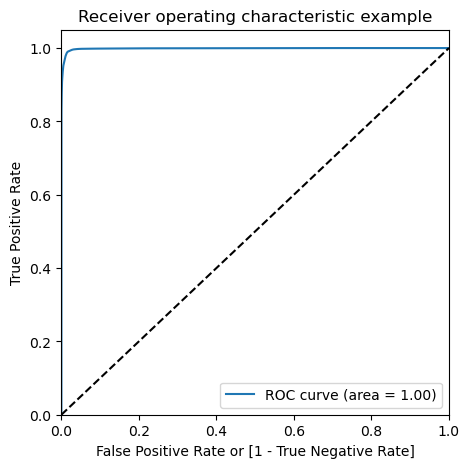

In [179]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

Prediction on the test set

In [180]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

print(confusionMatrix(y_test, y_test_pred))

{'Confussion Matrix': {'True Positive': 77, 'True Negative': 55852, 'False Positive': 1014, 'False Negative': 19}, 'Accuracy': 0.9818651030511569, 'Sensitivity': 0.8020833333333334, 'Specificity': 0.9821686069004326, 'F1 score': 0.12973883740522324}


In [181]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



0.8551876157692353


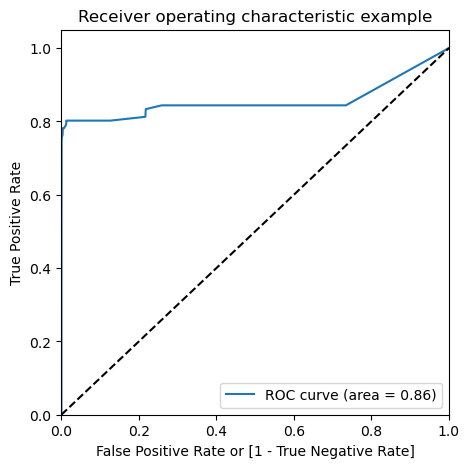

In [182]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

1. Train set

    Accuracy:- 0.9867794538555896
    
    Sensitivity:- 0.9895624953286232
    
    Specificity:- 0.9839964123825561

    ROC: 1

2. Test set
    Accuracy:- 0.9818651030511569
    
    Sensitivity:- 0.8020833333333334
    
    Specificity:- 0.9821686069004326

    ROC: 0.86

**AdaSyn (Adaptive Synthetic Sampling)**

In [183]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


**Logistic Regression**

In [184]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [185]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.212896,0.087628,0.106969,0.006492,0.01,{'C': 0.01},0.963472,0.962327,0.963273,0.963024,0.000499,6,0.962770,0.963211,0.963172,0.963051,0.000199
1,1.152964,0.111945,0.114195,0.039687,0.1,{'C': 0.1},0.963578,0.962435,0.963370,0.963128,0.000497,5,0.962881,0.963305,0.963272,0.963153,0.000192
2,1.381416,0.118891,0.084728,0.006622,1,{'C': 1},0.963585,0.962442,0.963376,0.963134,0.000497,4,0.962890,0.963312,0.963278,0.963160,0.000191
3,1.203862,0.117542,0.092714,0.014429,10,{'C': 10},0.963585,0.962443,0.963377,0.963135,0.000496,3,0.962891,0.963312,0.963279,0.963161,0.000191
4,1.044693,0.029633,0.078121,0.003571,100,{'C': 100},0.963585,0.962443,0.963377,0.963135,0.000496,2,0.962891,0.963312,0.963279,0.963161,0.000191
5,1.109506,0.030195,0.095452,0.029592,1000,{'C': 1000},0.963585,0.962443,0.963377,0.963135,0.000496,1,0.962891,0.963312,0.963279,0.963161,0.000191


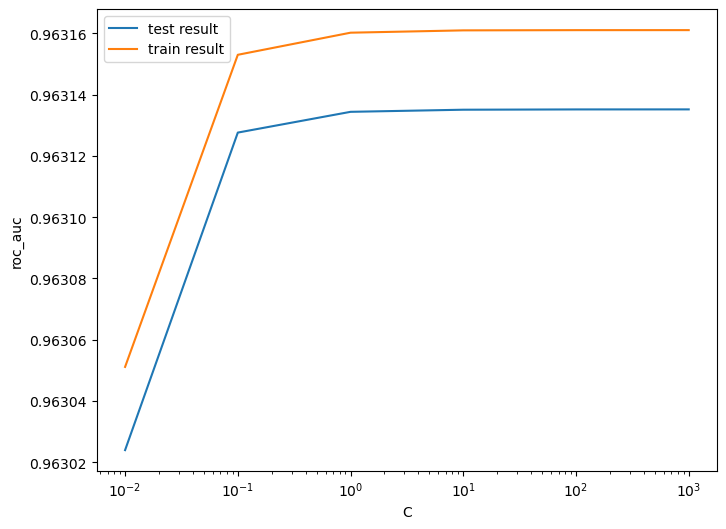

In [186]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [187]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.963135148223901 at C = 1000


Logistic regression with optimal C

In [188]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

Prediction on the train set

In [189]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

print(confusionMatrix(y_train_adasyn, y_train_pred))

{'Confussion Matrix': {'True Positive': 196162, 'True Negative': 207019, 'False Positive': 20430, 'False Negative': 31286}, 'Accuracy': 0.8863127257379143, 'Sensitivity': 0.862447680348915, 'Specificity': 0.9101776662020936, 'F1 score': 0.8835330150436899}


In [190]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



0.9631610160068507


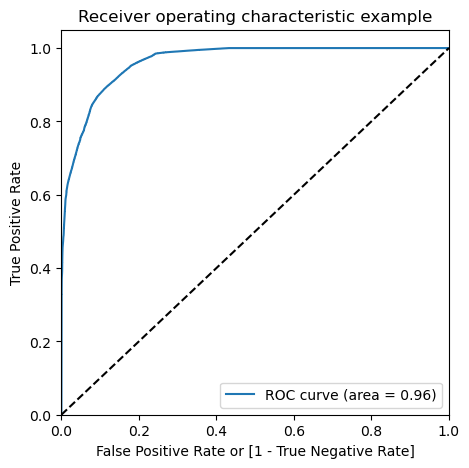

In [191]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

Prediction on the test set

In [192]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

print(confusionMatrix(y_test, y_test_pred))

{'Confussion Matrix': {'True Positive': 92, 'True Negative': 51642, 'False Positive': 5224, 'False Negative': 4}, 'Accuracy': 0.9082195147642288, 'Sensitivity': 0.9583333333333334, 'Specificity': 0.9081349136566665, 'F1 score': 0.03399852180339985}


In [193]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



0.9671573487086602


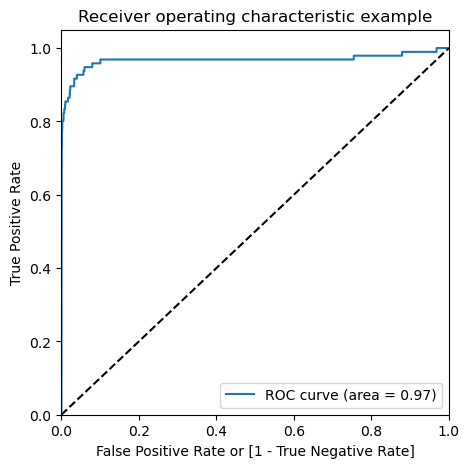

In [194]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model Summary**

1. Train Set

    Accuracy:- 0.886343501935603
    
    Sensitivity:- 0.862447680348915
    
    Specificity:- 0.9102392184621607
    
    F1-Score:- 0.8835608725615167
    
    ROC: 0.96

2. Test set

    Accuracy:- 0.9082370703275868
    
    Sensitivity:- 0.9583333333333334
    
    Specificity:- 0.908152498856962

    ROC: 0.97

**Decision Tree**

In [195]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [196]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.782586,0.821011,0.088364,0.017426,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920356,0.909339,0.910884,0.007186,7
1,8.086960,1.226422,0.081561,0.015489,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920356,0.909339,0.910884,0.007186,7
2,7.220145,0.789509,0.078802,0.009365,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920310,0.913511,0.912260,0.007139,5
3,8.107882,0.140580,0.083079,0.007926,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920316,0.912920,0.912065,0.007112,6
4,13.777630,0.393178,0.079068,0.000867,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.933957,0.947004,0.934991,0.938651,0.005922,4
5,13.507603,0.291924,0.080369,0.007483,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.935278,0.946339,0.934703,0.938773,0.005355,3
6,13.426793,0.602362,0.080991,0.007833,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.937928,0.944927,0.941878,0.941578,0.002865,1
7,13.160941,0.342820,0.076902,0.004929,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.936395,0.945098,0.940432,0.940642,0.003556,2


In [197]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9415776055135696
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [198]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

Prediction on the train set

In [199]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

print(confusionMatrix(y_train_adasyn, y_train_pred))

{'Confussion Matrix': {'True Positive': 226330, 'True Negative': 215929, 'False Positive': 11520, 'False Negative': 1118}, 'Accuracy': 0.9722178866864367, 'Sensitivity': 0.9950845907636031, 'Specificity': 0.9493512831447929, 'F1 score': 0.9728389118371453}


In [200]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



0.9917591040224101


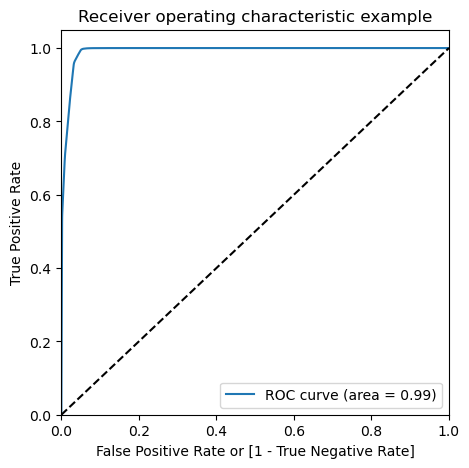

In [201]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

Prediction on the test set

In [202]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

print(confusionMatrix(y_test, y_test_pred))

{'Confussion Matrix': {'True Positive': 81, 'True Negative': 53880, 'False Positive': 2986, 'False Negative': 15}, 'Accuracy': 0.9473157543625575, 'Sensitivity': 0.84375, 'Specificity': 0.9474905919178419, 'F1 score': 0.05121719886184002}


In [203]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



0.9141440147305362


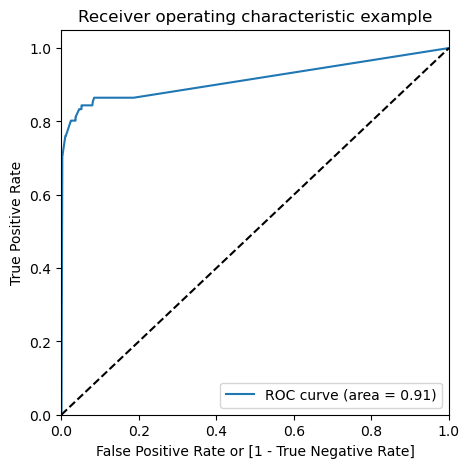

In [204]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model Summary**

1. Train Set

    Accuracy:- 0.9722178866864367
    
    Sensitivity:- 0.9950845907636031
    
    Specificity:- 0.9493512831447929
    
    ROC:- 0.99

2. Test Set

    Accuracy:- 0.9473157543625575
    
    Sensitivity:- 0.84375
    
    Specificity:- 0.9474905919178419

    ROC:- 0.91

**XGBoost**

In [205]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [206]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.392757,0.181726,0.170496,0.003200,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975756,0.996402,0.993919,0.988692,0.009203,4,0.999297,0.998992,0.999160,0.999150,0.000125
1,4.394829,0.169565,0.192542,0.016941,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.976063,0.995996,0.995207,0.989088,0.009216,3,0.999291,0.999086,0.999233,0.999203,0.000086
2,4.230453,0.018767,0.167175,0.004183,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.976420,0.996090,0.993491,0.988667,0.008725,6,0.999310,0.999026,0.999176,0.999171,0.000116
3,4.160904,0.155556,0.175812,0.021241,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.974789,0.996623,0.994658,0.988690,0.009862,5,0.999911,0.999935,0.999933,0.999926,0.000011
4,4.252468,0.098339,0.164758,0.006680,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.975207,0.997983,0.996377,0.989856,0.010379,1,0.999917,0.999937,0.999931,0.999928,0.000009
5,4.180117,0.207999,0.163370,0.005578,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.974465,0.996719,0.997379,0.989521,0.010649,2,0.999941,0.999934,0.999956,0.999944,0.000009


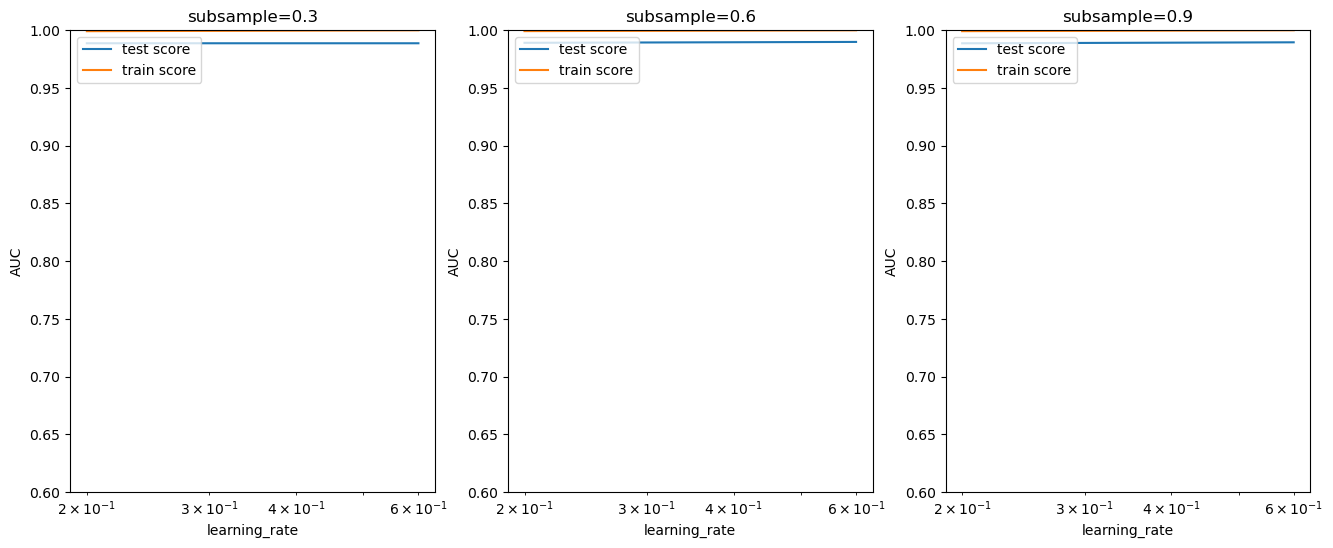

In [207]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [208]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [209]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

Prediction on the train set

In [210]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

print(confusionMatrix(y_train_adasyn, y_train_adasyn))

{'Confussion Matrix': {'True Positive': 227448, 'True Negative': 227449, 'False Positive': 0, 'False Negative': 0}, 'Accuracy': 1.0, 'Sensitivity': 1.0, 'Specificity': 1.0, 'F1 score': 1.0}


1.0


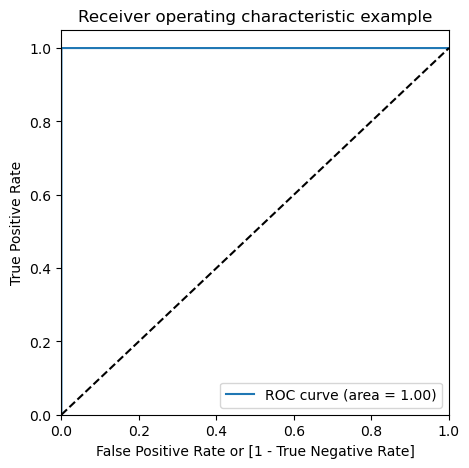

In [211]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

Prediction on the test set

In [212]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

print(confusionMatrix(y_test, y_test_pred))

{'Confussion Matrix': {'True Positive': 74, 'True Negative': 56828, 'False Positive': 38, 'False Negative': 22}, 'Accuracy': 0.9989466661985184, 'Sensitivity': 0.7708333333333334, 'Specificity': 0.9993317623887736, 'F1 score': 0.7115384615384616}


In [213]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.66      0.77      0.71        96

    accuracy                           1.00     56962
   macro avg       0.83      0.89      0.86     56962
weighted avg       1.00      1.00      1.00     56962



0.951038589256615


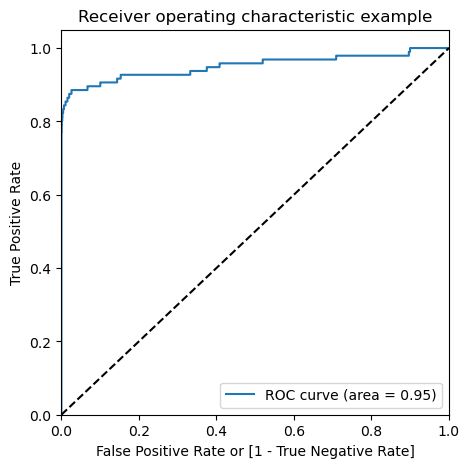

In [214]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
print(auc)

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model Summary**

1. Train Set

    Accuracy:- 0.9999934051004953
    
    Sensitivity:- 1.0
    
    Specificity:- 1.0

    ROC:- 1.0

2. Test Set
    Accuracy:- 0.9989466661985184
    
    Sensitivity:- 0.7708333333333334
    
    Specificity:- 0.9993317623887736

    ROC:- 0.95


**Choosing best model on the balanced data**

He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some information were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the Logistic regression model with SMOTE is the best model for its simlicity and less resource requirement.

**Summary to the business**

For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.

End